# Annalyse des données
## Importation des modules et données


In [2]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, StandardScaler

plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set()


#récupère variable depuis autre Notebook
# %store -r trans_prod_custo_cleannan 

data_librairie = pd.read_csv("dataset_P4/data_librairie.csv", sep=",") #lire fichier csv


data_librairie_clean = data_librairie.drop(columns='Unnamed: 0')
data_librairie_without_imputation = data_librairie_clean[data_librairie_clean["client_id"] != "c_imput"]
data_librairie_without_imputation_outlier = data_librairie_without_imputation[~(data_librairie_without_imputation['client_id']== "c_1609") | (data_librairie_without_imputation['client_id']== "c_3454") | (data_librairie_without_imputation['client_id']== "c_4958") | (data_librairie_without_imputation['client_id']== "c_6714")]

data_librairie_without_imputation_outlier

,id_prod,date,session_id,client_id,price,categ,sex,birth,age transact
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45
...,...,...,...,...,...,...,...,...,...
336708,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55
336709,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89
336710,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89
336711,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52


## Observation de la répartition du CA par produit

In [4]:
CA_categ = data_librairie_without_imputation.pivot_table('price', columns='categ', aggfunc=sum)
print("CA/categ")
display(CA_categ)

prixmoyen_categ =data_librairie_without_imputation.pivot_table('price', columns='categ')

print("prix moyen par categ")
display(prixmoyen_categ)




CA/categ


categ,0.0,1.0,2.0
price,2.229723e+06,2.247384e+06,1319470.71


prix moyen par categ


categ,0.0,1.0,2.0
price,10.646828,20.480106,75.174949


In [5]:
CA_par_prod = (data_librairie_without_imputation.pivot_table('price', index = "id_prod", aggfunc=sum)).sort_values(by = 'price')
print(CA_par_prod)

CA_par_prod["%cumuléCAparproduit"] = CA_par_prod["price"].cumsum()/CA_par_prod["price"].sum()
# CA_par_prod["1"] = 1
# CA_par_prod["%cumuléproduit"] = (CA_par_prod["1"]).cumsum()/CA_par_prod.index.nunique()
# CA_par_prod
CA_par_prod["%cumuléproduit"] = np.linspace(0,1, num= CA_par_prod.index.nunique())
CA_par_prod

            price
id_prod          
0_1653       0.99
0_1539       0.99
0_1840       1.28
0_1284       1.38
0_1858       1.83
...           ...
2_110    27016.50
2_209    27296.10
2_102    28919.46
2_112    31960.61
2_135    33874.09

[3264 rows x 1 columns]


,price,%cumuléCAparproduit,%cumuléproduit
id_prod,,,
0_1653,0.99,1.707904e-07,0.000000
0_1539,0.99,3.415809e-07,0.000306
0_1840,1.28,5.624008e-07,0.000613
0_1284,1.38,8.004723e-07,0.000919
0_1858,1.83,1.116176e-06,0.001226
...,...,...,...
2_110,27016.50,9.789444e-01,0.998774
2_209,27296.10,9.836534e-01,0.999081
2_102,28919.46,9.886425e-01,0.999387


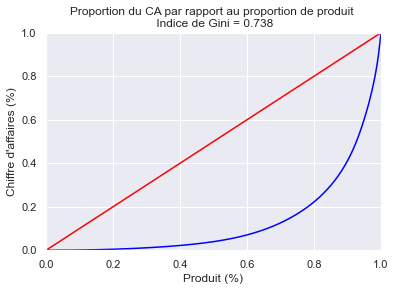

<Figure size 3600x2000 with 0 Axes>

In [6]:
fig = plt.figure()
ax = plt.axes()
plt.axis([0, 1, 0, 1]);
plt.title("% cumulé du CA par rapport au % cumulé du nombre de produit ")
plt.plot(CA_par_prod["%cumuléproduit"], CA_par_prod["%cumuléproduit"], color='red')
plt.title("Proportion du CA par rapport au proportion de produit \n Indice de Gini = 0.738")
plt.ylabel("Chiffre d'affaires (%)")
plt.xlabel("Produit (%)")
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(18,10), dpi=200)
plt.savefig('./dataset_P4/Lorenz_gini_CA_nbproduit.png')


graph_CA_par_prod_pourcentcumulé = ax.plot(CA_par_prod["%cumuléproduit"], CA_par_prod["%cumuléCAparproduit"], color='blue', linestyle='solid', label='bleu');
graph_CA_par_prod_pourcentcumulé

calcul de l'indice de Gini :

In [7]:
(0.5-((CA_par_prod["%cumuléCAparproduit"]*(1/(CA_par_prod["%cumuléCAparproduit"].nunique()))).sum()))*2 

0.7382219005366575

## Observation de la répartition du CA mensuel par catégorie

In [8]:
CA_par_prod["price"].sort_values(ascending = False).head(10)

# by = 'price', ascending = False

id_prod
2_135    33874.09
2_112    31960.61
2_102    28919.46
2_209    27296.10
2_110    27016.50
1_369    25933.19
1_395    25830.09
2_166    25534.44
2_43     25266.39
2_39     25225.65
Name: price, dtype: float64

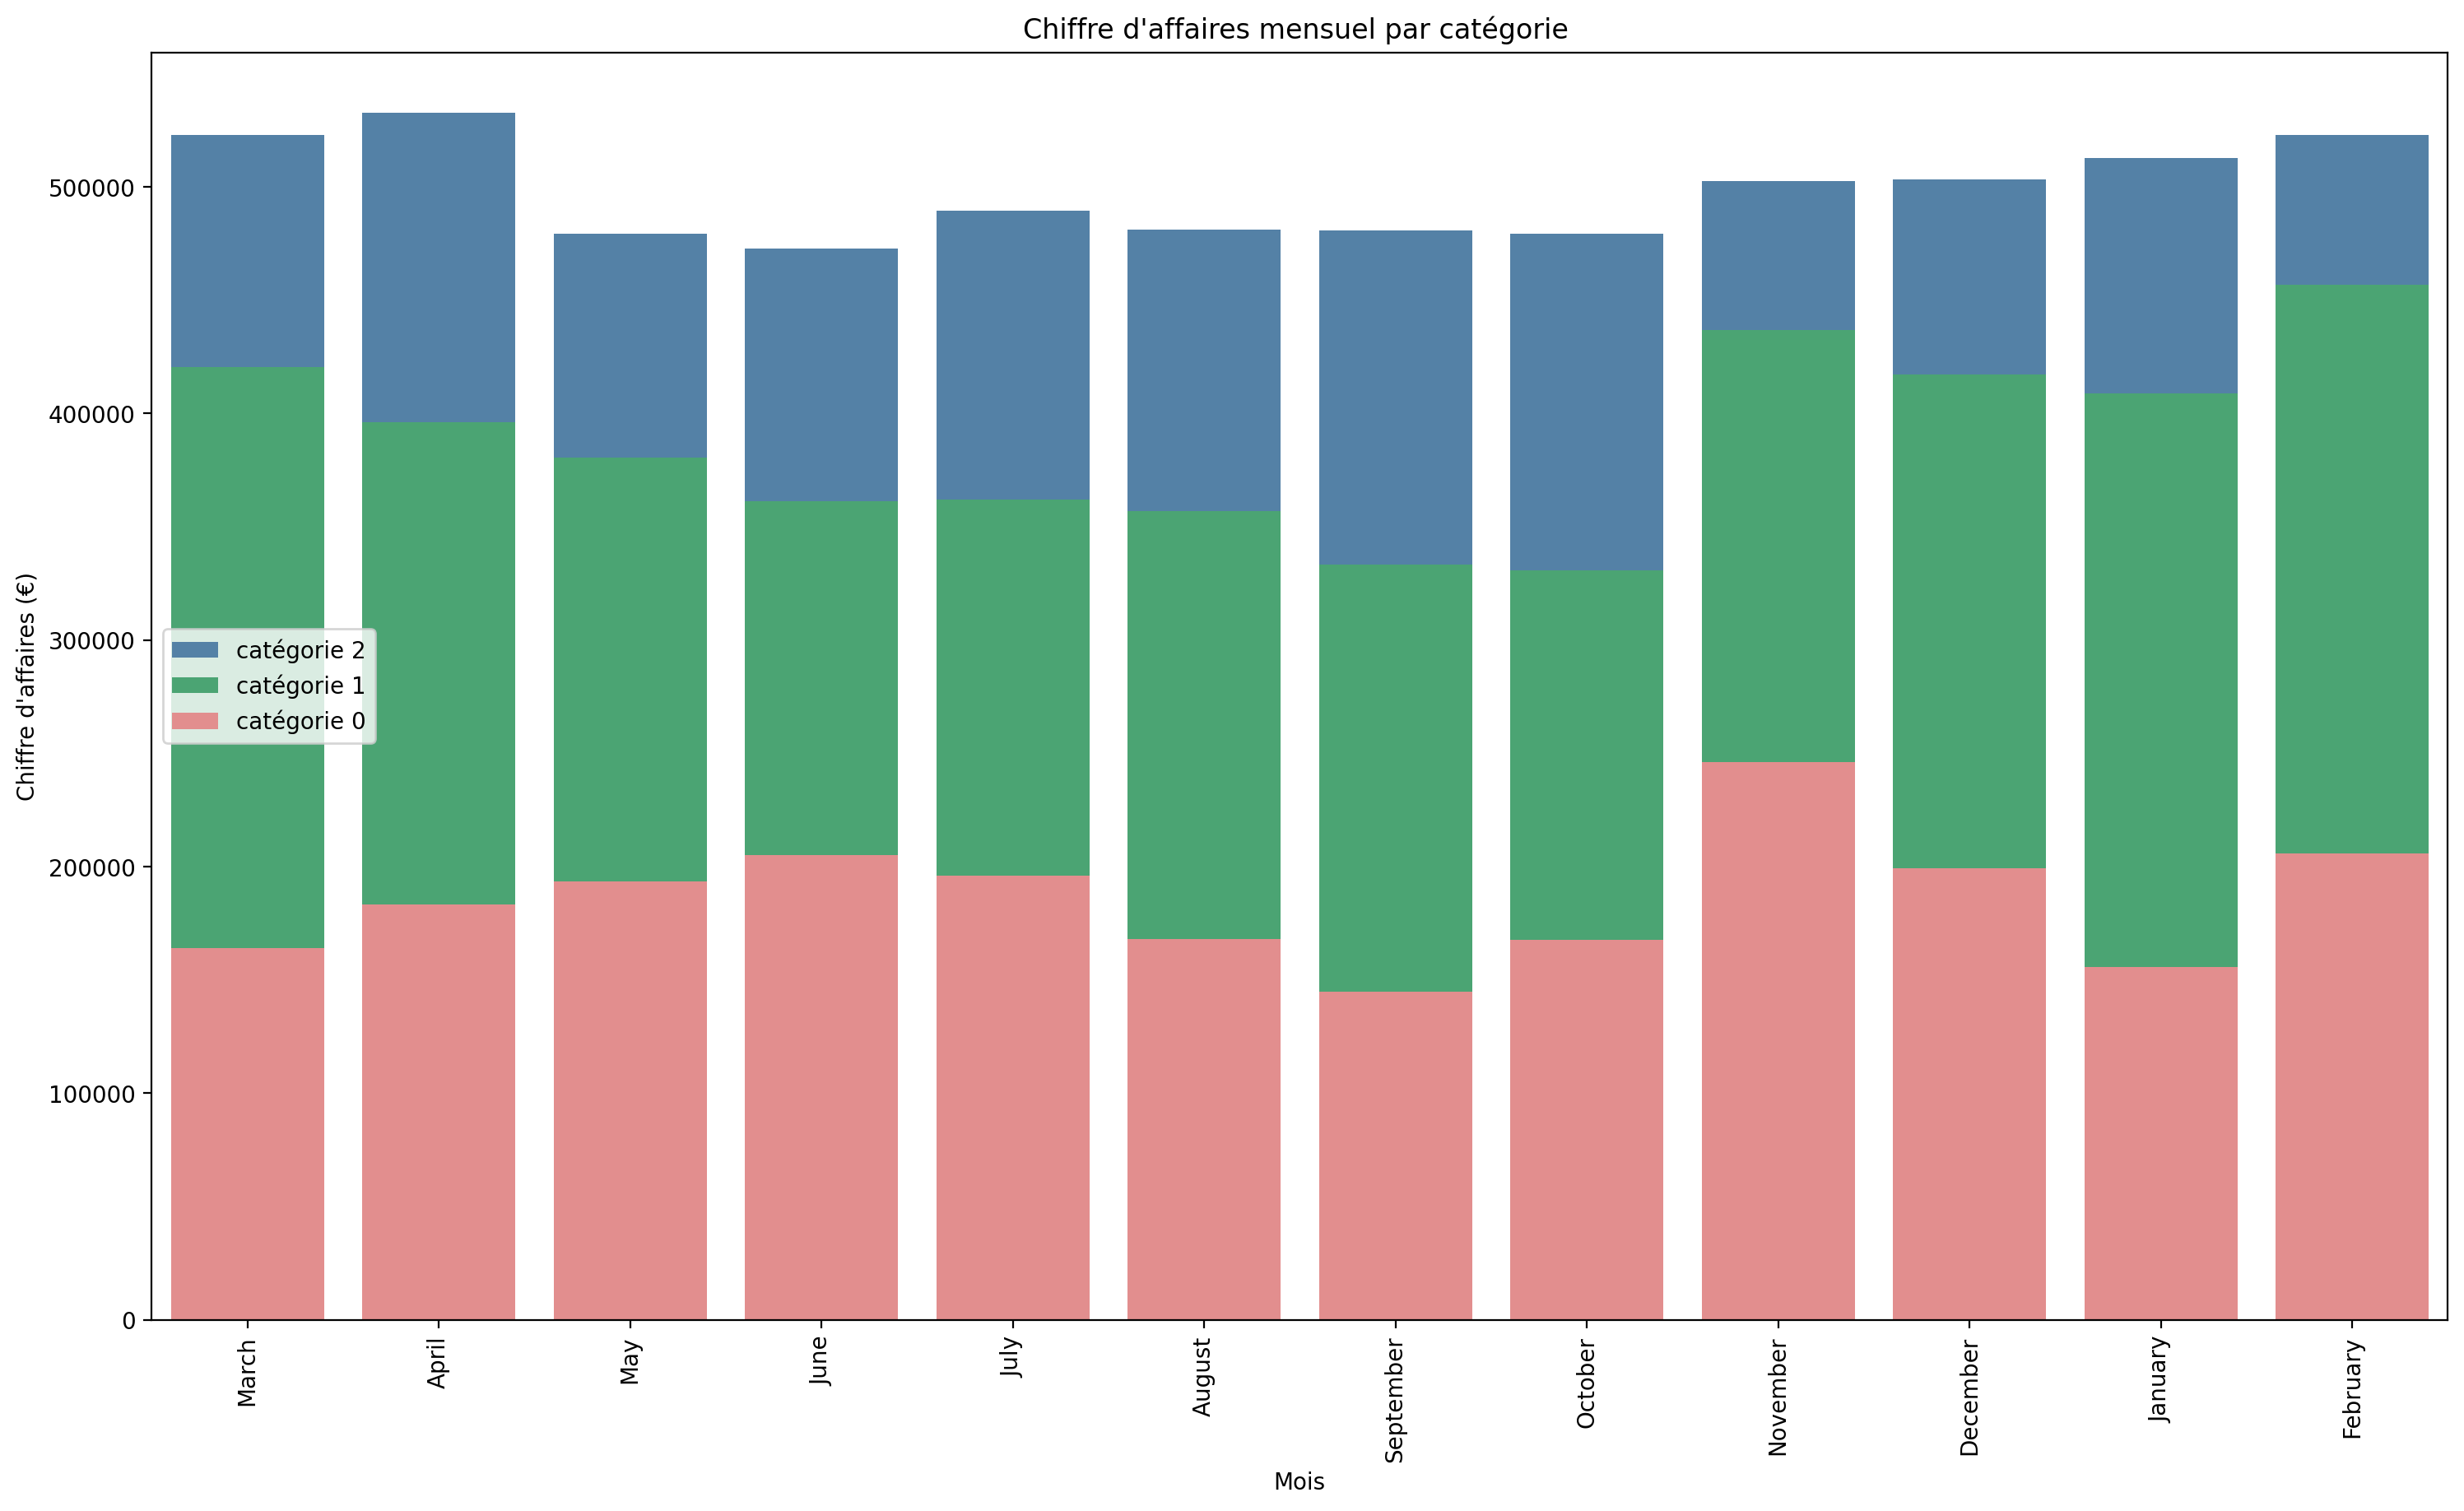

In [7]:




categ = data_librairie_clean.pivot_table("price", index = (pd.to_datetime(data_librairie_clean["date"])).dt.month, columns = "categ", aggfunc=sum)
categ["mois numérique"] = pd.date_range('3/1/2021', periods=12, freq='M')
categ["mois écrit"] = categ["mois numérique"].dt.month_name()

plt.style.use('default')
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(18,10), dpi=200)


sns.barplot(x=categ["mois écrit"], y=categ[0]+categ[1]+categ[2], 
            data=categ,
            label='catégorie 2',
            color='steelblue')

sns.barplot(x=categ["mois écrit"], y=(categ[0]+categ[1]), 
            data=categ,
            label='catégorie 1',
            color='mediumseagreen')

sns.barplot(x=categ["mois écrit"], y=categ[0], 
            data=categ,
            label='catégorie 0',
            color='lightcoral')



plt.xticks(rotation=90)
plt.legend(loc = 'center left')
plt.title("Chiffre d'affaires mensuel par catégorie ")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Mois")
plt.savefig('./dataset_P4/CA_month_by_categorie.png')

plt.show()

## Observation de la taille moyenne des paniers en nombre de produit

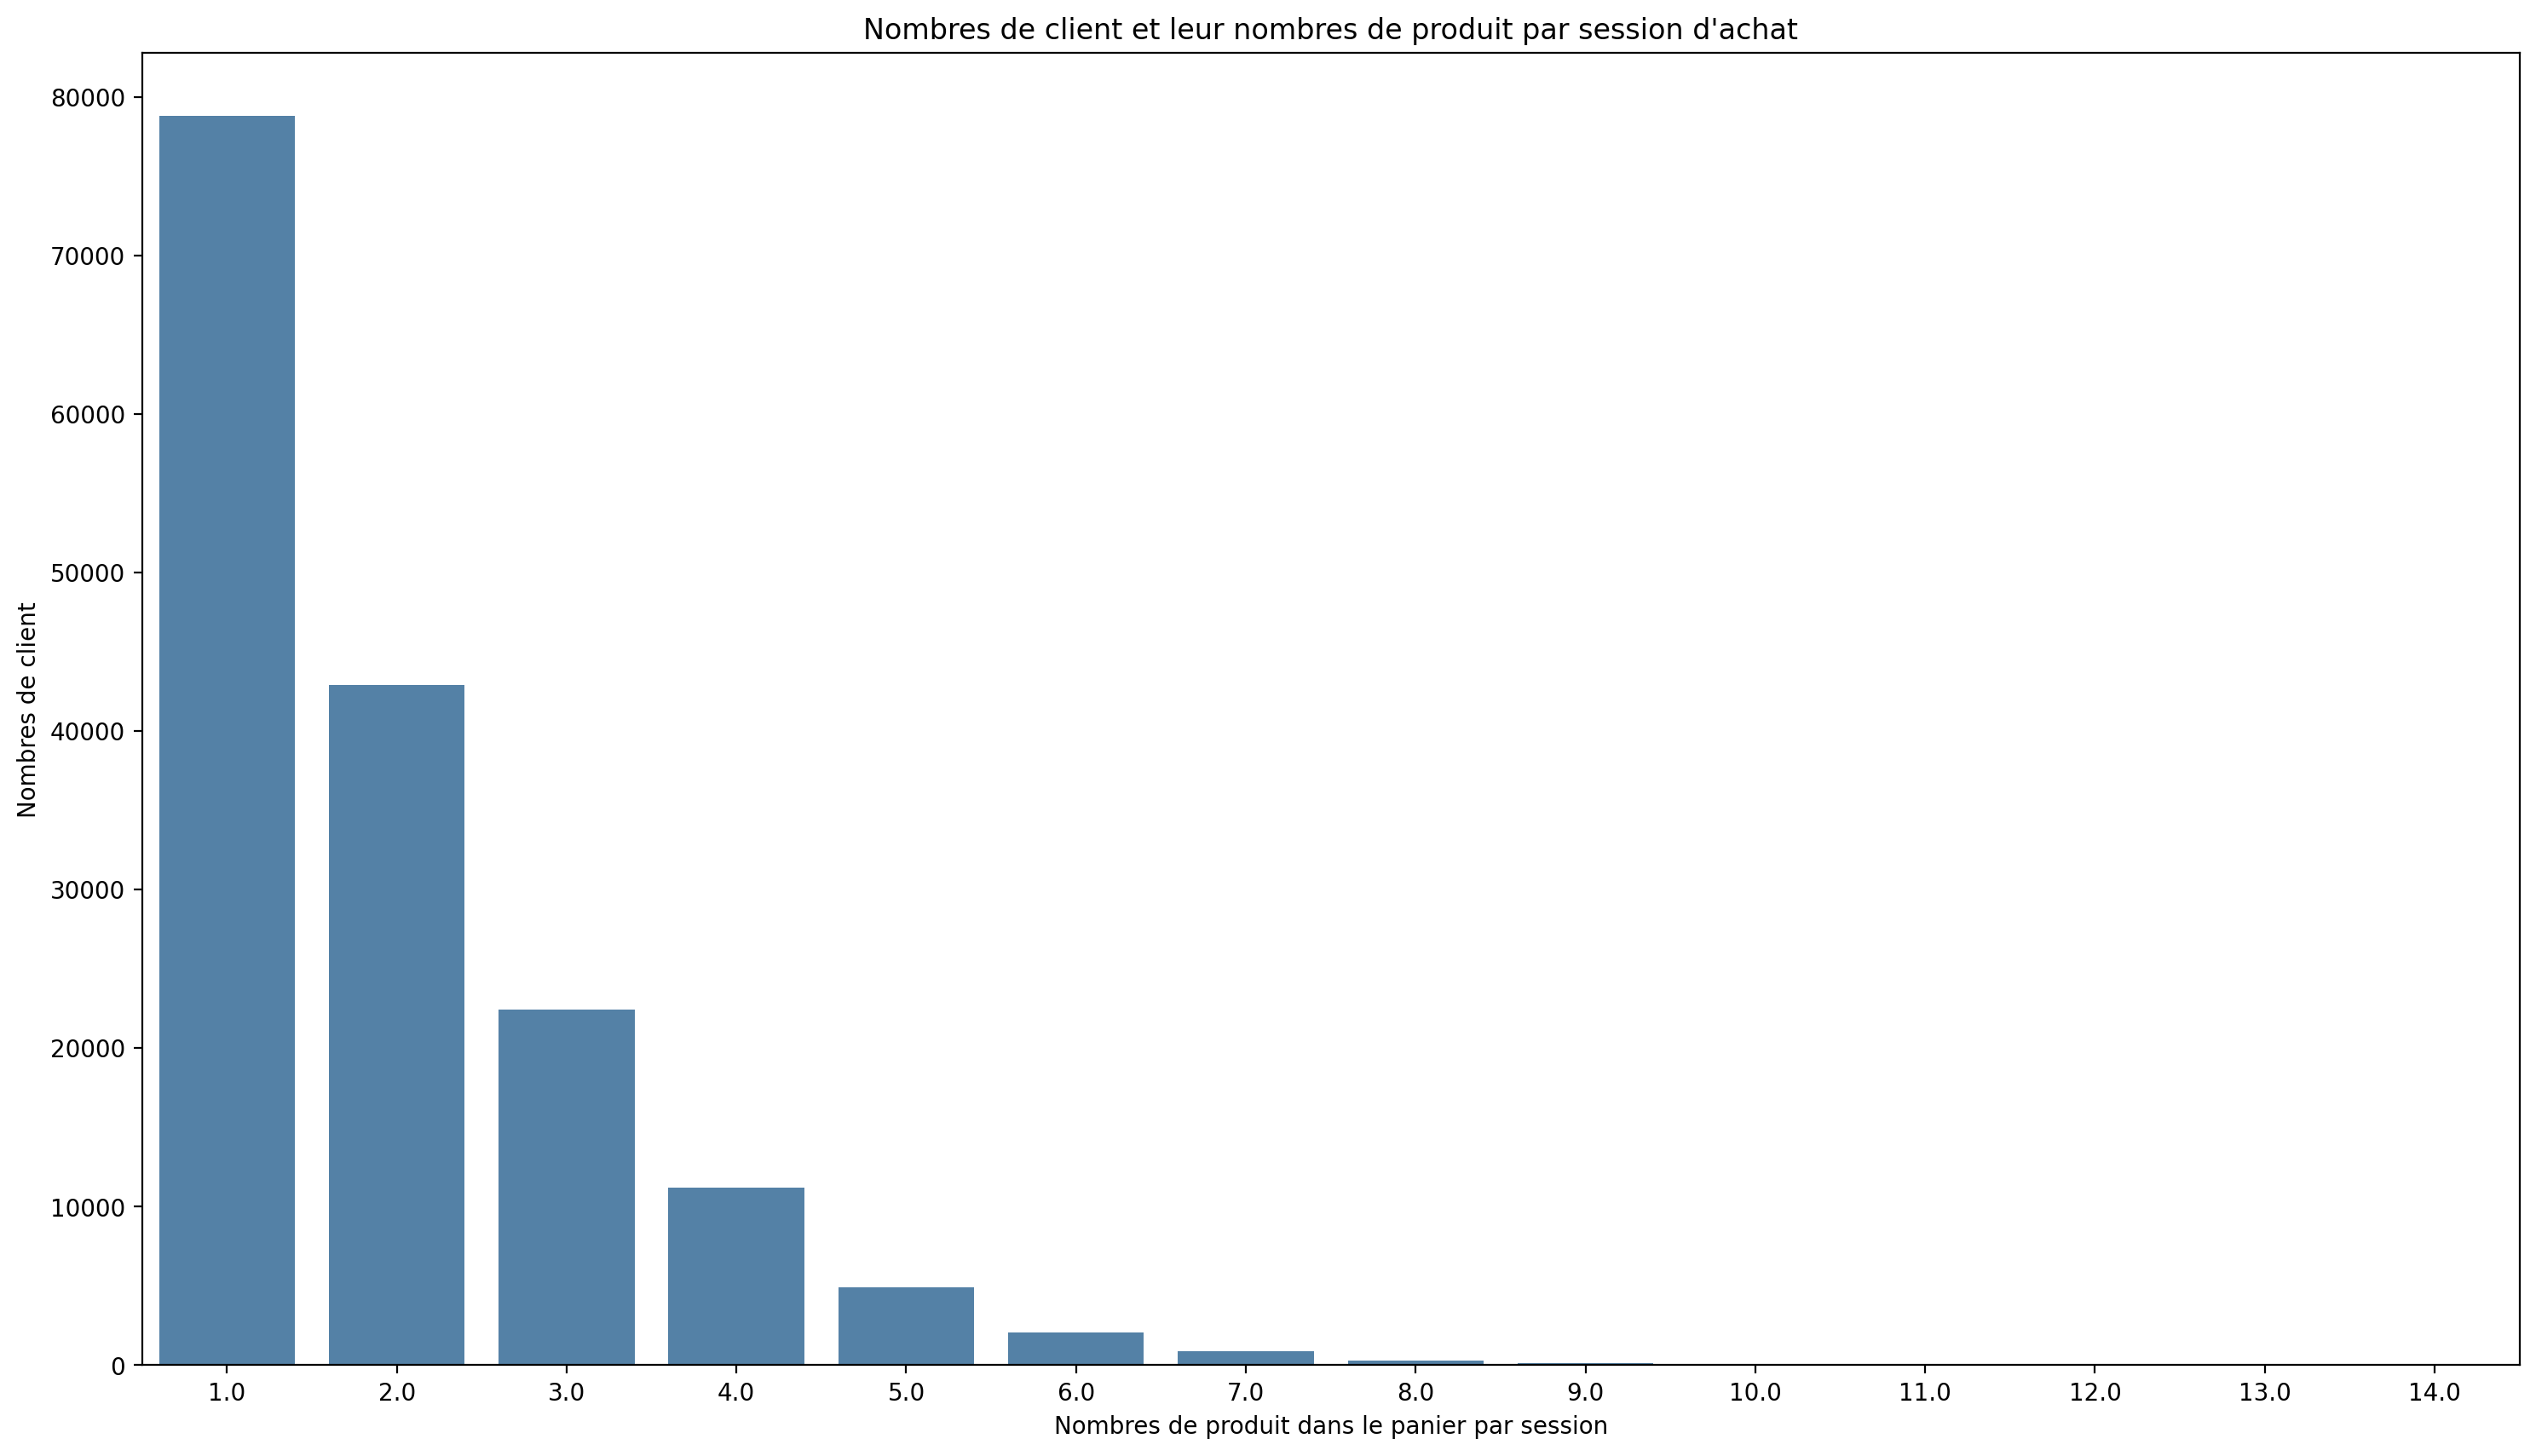

,nb de produit,occurrence
1.0,1.0,78814
2.0,2.0,42883
3.0,3.0,22451
4.0,4.0,11195
5.0,5.0,4907
6.0,6.0,2078
7.0,7.0,865
8.0,8.0,308
9.0,9.0,116
10.0,10.0,35


In [8]:
# on ne prend pas en compte les valeurs imputé et on enlève les outliers




nb_prod_par_session = (data_librairie_without_imputation_outlier["session_id"].value_counts()).value_counts()
nb_prod_par_session_df = pd.DataFrame(index = (np.linspace(1,13, num= nb_prod_par_session.nunique())), columns = [ 'nb de produit', 'occurrence' ])


nb_prod_par_session_df["occurrence"] = nb_prod_par_session
nb_prod_par_session_df["nb de produit"] = (np.linspace(1,13, num= nb_prod_par_session.nunique()))
nb_prod_par_session_df.loc[14]=[ 14, 1] #car supprimer la 1er ligne avec DF
nb_prod_par_session_df

# On peut aussi définir un nombre d'intervalles: >> df['AGE'].value_counts(bins=10)
# et même personnaliser la taille des intervalles: >> df['AGE'].value_counts(bins=[0,10,20,25,30,35,40,60,80]

plt.style.use('default')
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(18,10), dpi=200)

sns.barplot(x="nb de produit", y="occurrence", 
            data=nb_prod_par_session_df,
            color='steelblue')

plt.title("Nombres de client et leur nombres de produit par session d'achat")
plt.ylabel("Nombres de client")
plt.xlabel("Nombres de produit dans le panier par session")
plt.savefig('./dataset_P4/nbclient_nbproduit_by_session.png')

plt.show()


nb_prod_par_session_df

## Observation du prix moyen par panier

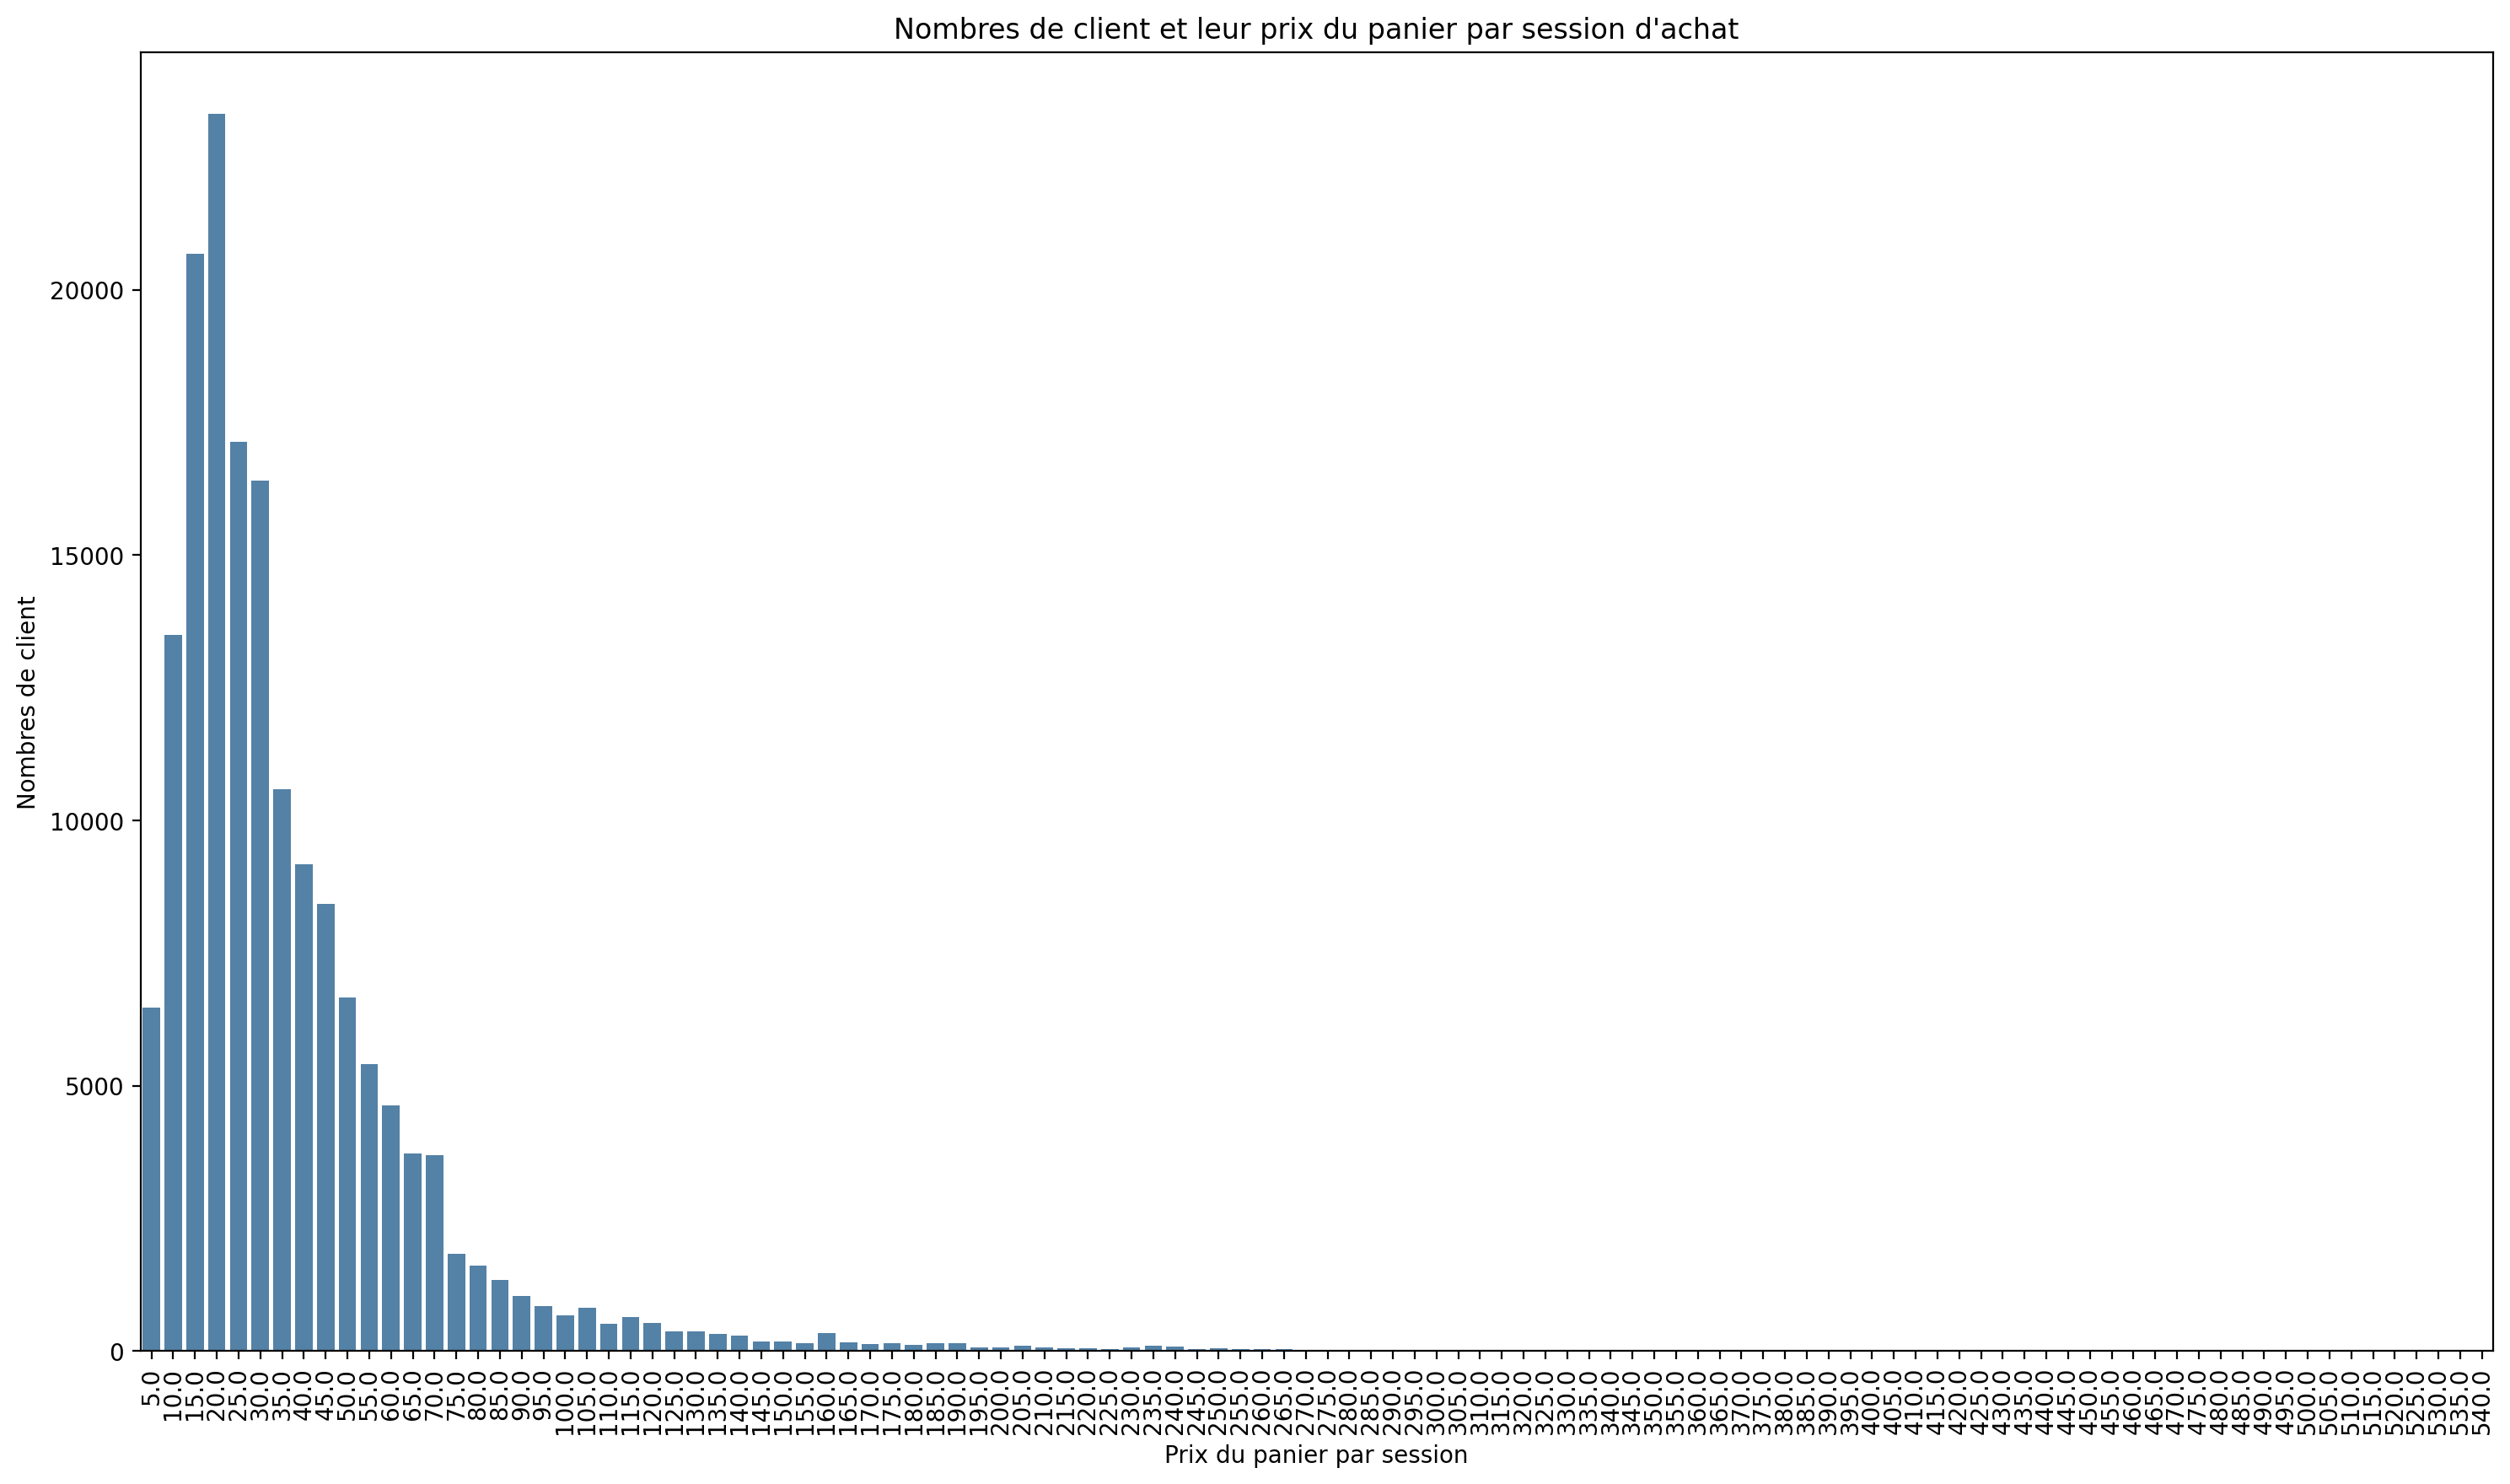

,occurrence
5.0,6470
10.0,13489
15.0,20674
20.0,23314
25.0,17144
...,...
520.0,0
525.0,0
530.0,0
535.0,0


In [9]:
prix_par_session = data_librairie_without_imputation_outlier.pivot_table("price", index = "session_id", aggfunc=sum)

prix_par_session_count = prix_par_session["price"].value_counts(bins=np.linspace(0,540, num= 109)).reindex(np.linspace(0,540, num= 109))




prix_par_session_count_df = pd.DataFrame(index = ((np.linspace(0,540, num= 109))), columns = ['occurrence' ])
prix_par_session_count_df["occurrence"] = prix_par_session_count
prix_par_session_count_df_clean = prix_par_session_count_df.drop(index=0.0)



plt.style.use('default')
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(18,10), dpi=200)

sns.barplot(x=prix_par_session_count_df_clean.index, y="occurrence", 
            data=prix_par_session_count_df_clean,
            color='steelblue')
plt.xticks(rotation=90)
plt.title("Nombres de client et leur prix du panier par session d'achat")
plt.ylabel("Nombres de client")
plt.xlabel("Prix du panier par session")
plt.savefig('./dataset_P4/nbclient_price_by_session_without_imputation.png')

plt.show()

x = prix_par_session_count_df.drop(index=0.0)
x

Premier graphique pas assez lisible

### Modification des données pour un gain en clarté

In [11]:
# calcul pour déterminer le % de données non utilisées
prix_par_session["price"].value_counts(bins=np.linspace(100,540, num= 2)) #1906 session avec panier supérieur à 160€(1,12%), 6590 > 100€(3.89%)
prix_par_session["price"].value_counts(bins=np.linspace(0,540, num= 2)) #169170 session total
6590/169170*100

3.8954897440444523

### Graphique avec des paniers maximum de 100€ (3% des données au-dela de cette valeur)

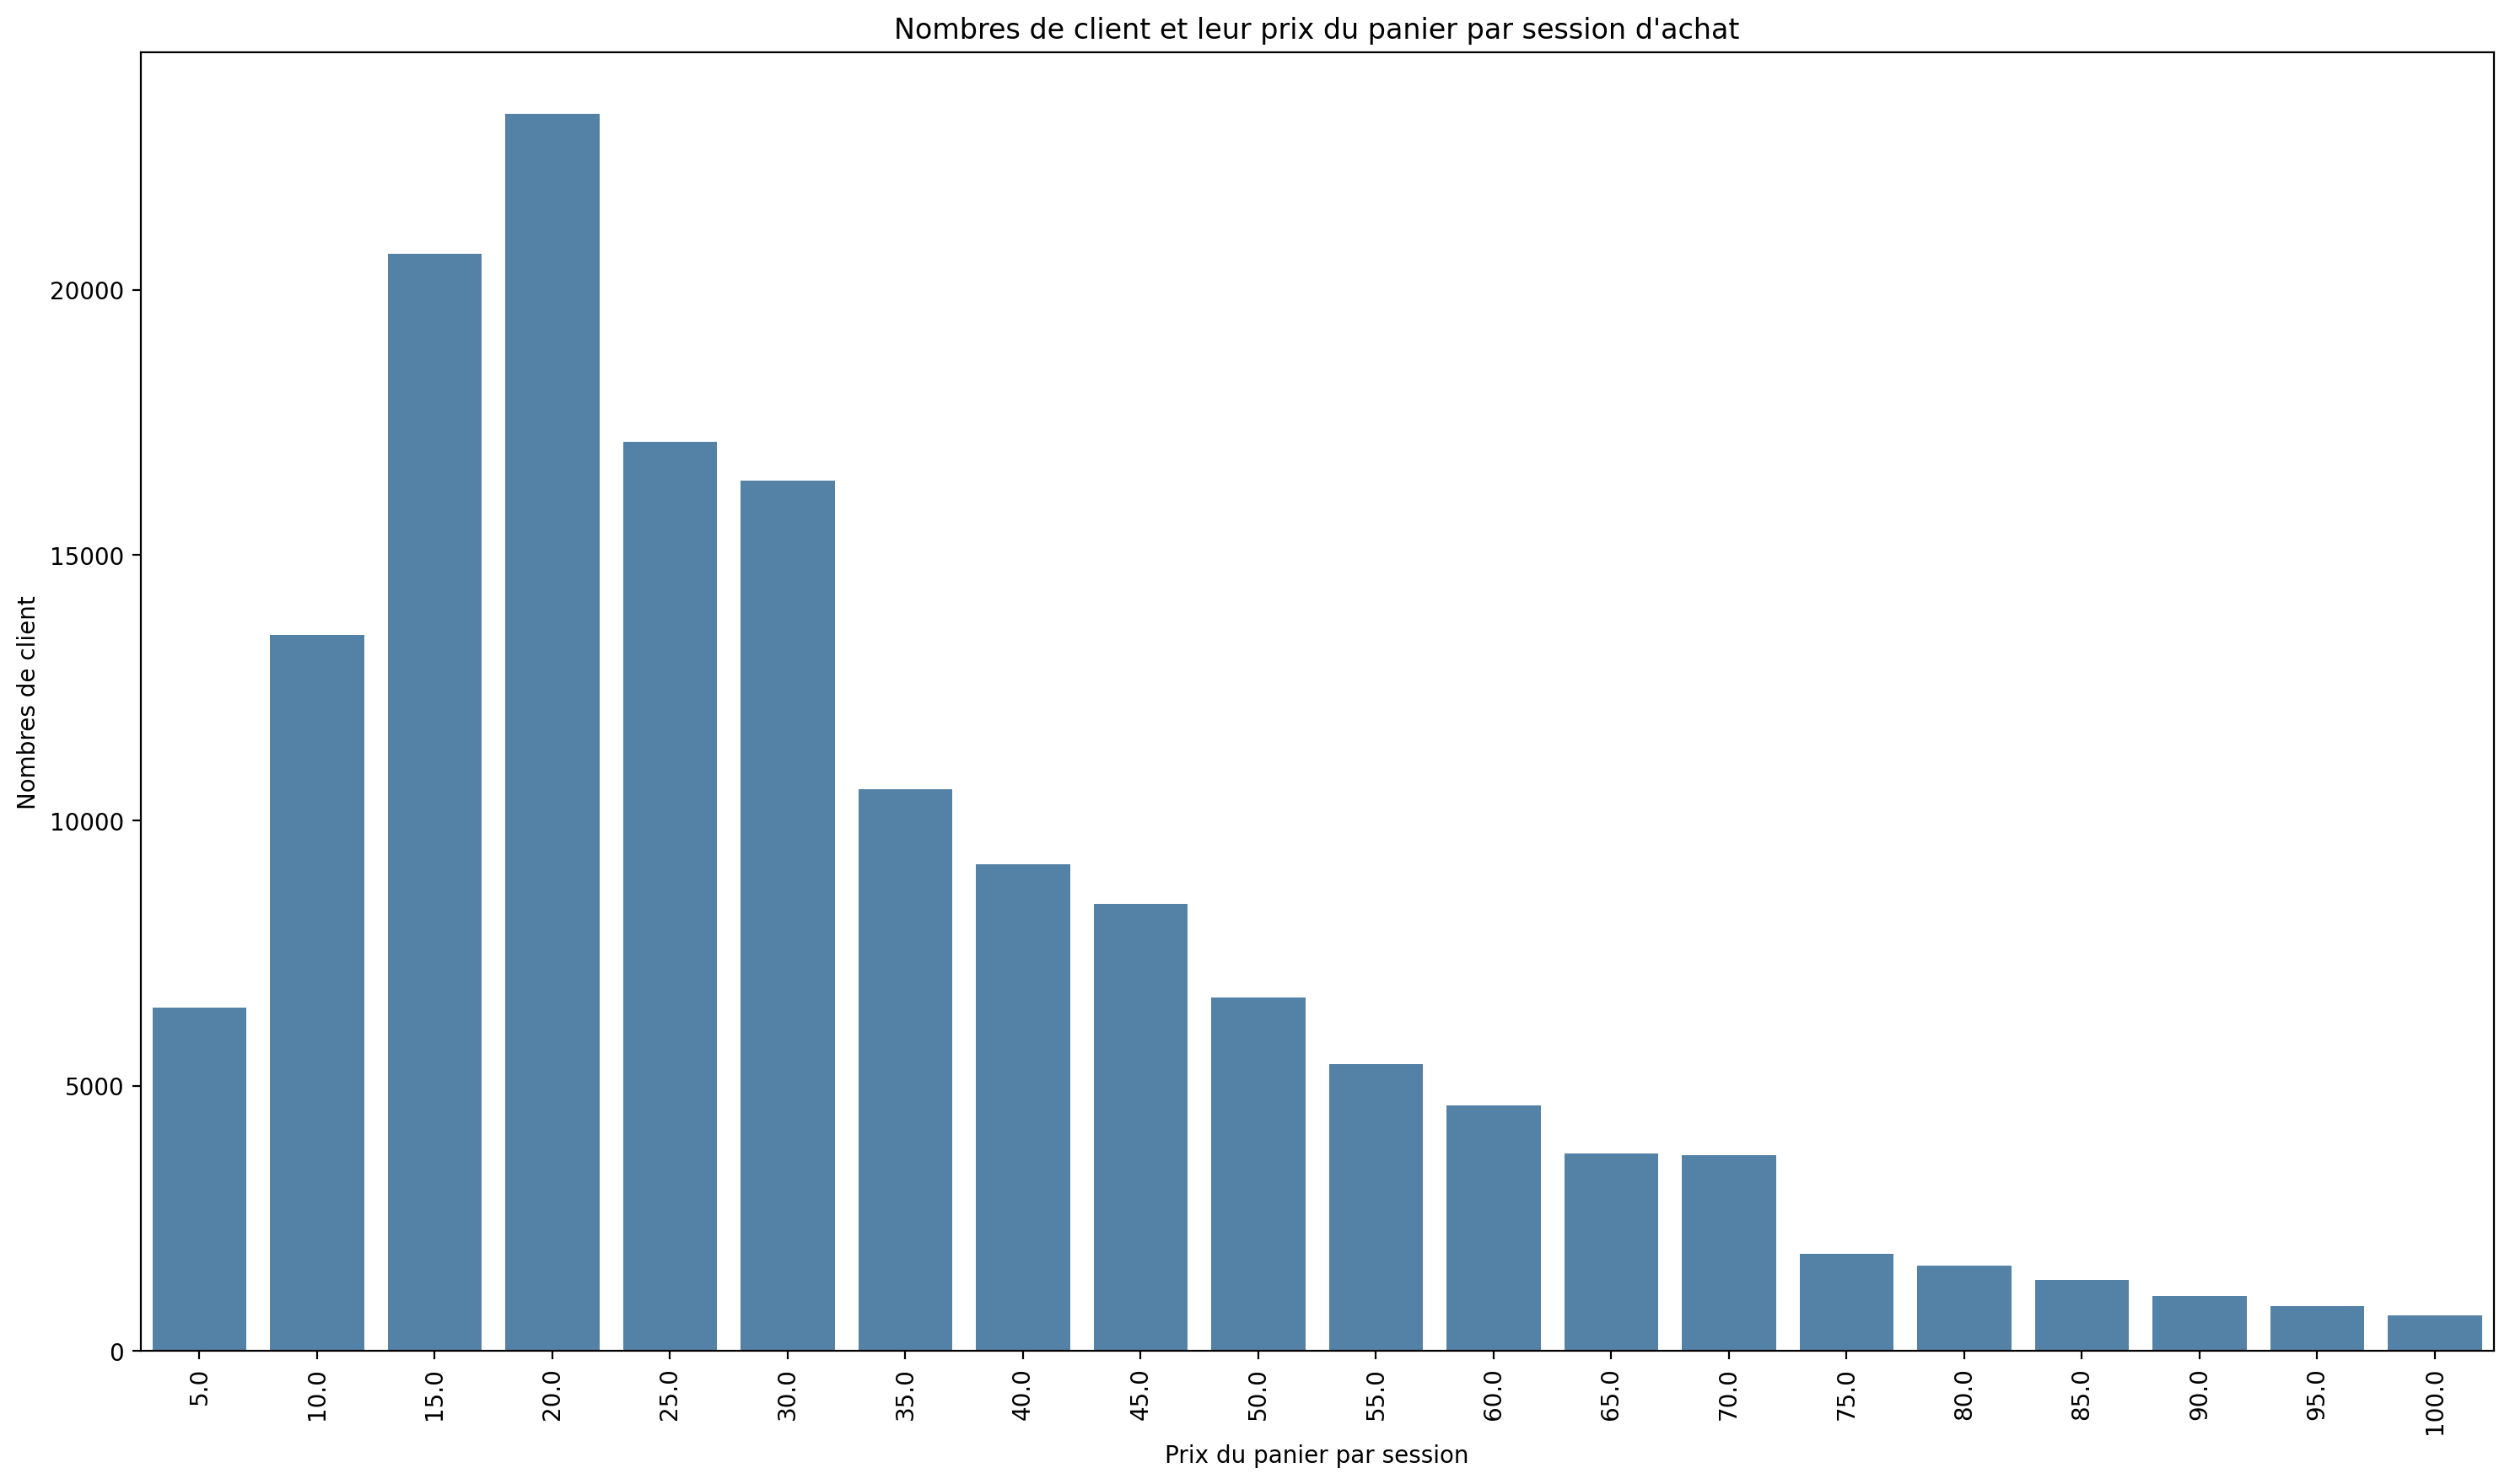

0.0       6470
5.0       6470
10.0     13489
15.0     20674
20.0     23314
25.0     17144
30.0     16401
35.0     10591
40.0      9171
45.0      8421
50.0      6660
55.0      5405
60.0      4627
65.0      3723
70.0      3691
75.0      1834
80.0      1611
85.0      1333
90.0      1030
95.0       838
100.0      672
Name: price, dtype: int64

In [11]:
prix_par_session_max100 = prix_par_session["price"].value_counts(bins=np.linspace(0,100, num= 21)).reindex(np.linspace(0,100, num= 21))


prix_par_session_max100_df = pd.DataFrame(index = ((np.linspace(0,100, num= 21))), columns = ['occurrence' ])
prix_par_session_max100_df["occurrence"] = prix_par_session_max100
prix_par_session_max100_df_clean = prix_par_session_max100_df.drop(index=0.0)




plt.style.use('default')
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(18,10), dpi=200)

a = sns.barplot(x=prix_par_session_max100_df_clean.index, y="occurrence", 
            data=prix_par_session_max100_df_clean,
            color='steelblue')
plt.xticks(rotation=90)
plt.title("Nombres de client et leur prix du panier par session d'achat")
plt.ylabel("Nombres de client")
plt.xlabel("Prix du panier par session")
plt.savefig('./dataset_P4/nbclient_price_by_session.png')
plt.show()

prix_par_session_max100.head(50)
# 5.0      13505

## Analyse de corrélation de pearson
### transformation des données en float

In [12]:
# transformation de toutes les données en float :
data_librairie_all_float = data_librairie_without_imputation_outlier
data_librairie_all_float["id_prod"] =pd.to_numeric(data_librairie_all_float["id_prod"].str[2:])
data_librairie_all_float["session_id"] = pd.to_numeric(data_librairie_all_float["session_id"].str[2:])
data_librairie_all_float["client_id"] = pd.to_numeric(data_librairie_all_float["client_id"].str[2:])
data_librairie_all_float["sex"] = pd.to_numeric((data_librairie_all_float['sex']).map({'m' : 1,'f' : 0}))
data_librairie_all_float["date"] = pd.to_numeric(data_librairie_all_float["date"].str[5:6])
data_librairie_all_float

<ipython-input-12-bed31696435a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_librairie_all_float["id_prod"] =pd.to_numeric(data_librairie_all_float["id_prod"].str[2:])
<ipython-input-12-bed31696435a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_librairie_all_float["session_id"] = pd.to_numeric(data_librairie_all_float["session_id"].str[2:])
<ipython-input-12-bed31696435a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,id_prod,date,session_id,client_id,price,categ,sex,birth,age transact
0,1483,0,18746,4450,4.99,0.0,0,1977,45
1,1085,0,97382,4450,3.99,0.0,0,1977,45
2,1453,0,81509,4450,7.99,0.0,0,1977,45
3,1405,0,81509,4450,4.99,0.0,0,1977,45
4,1392,1,141302,4450,6.30,0.0,0,1977,45
...,...,...,...,...,...,...,...,...,...
336708,607,0,95185,4786,26.99,1.0,0,1967,55
336709,673,0,42350,2793,12.99,1.0,1,1933,89
336710,2075,1,102200,2793,8.99,0.0,1,1933,89
336711,1692,0,90430,4478,13.36,0.0,0,1970,52


### Réalisation d'un graphique Heat map

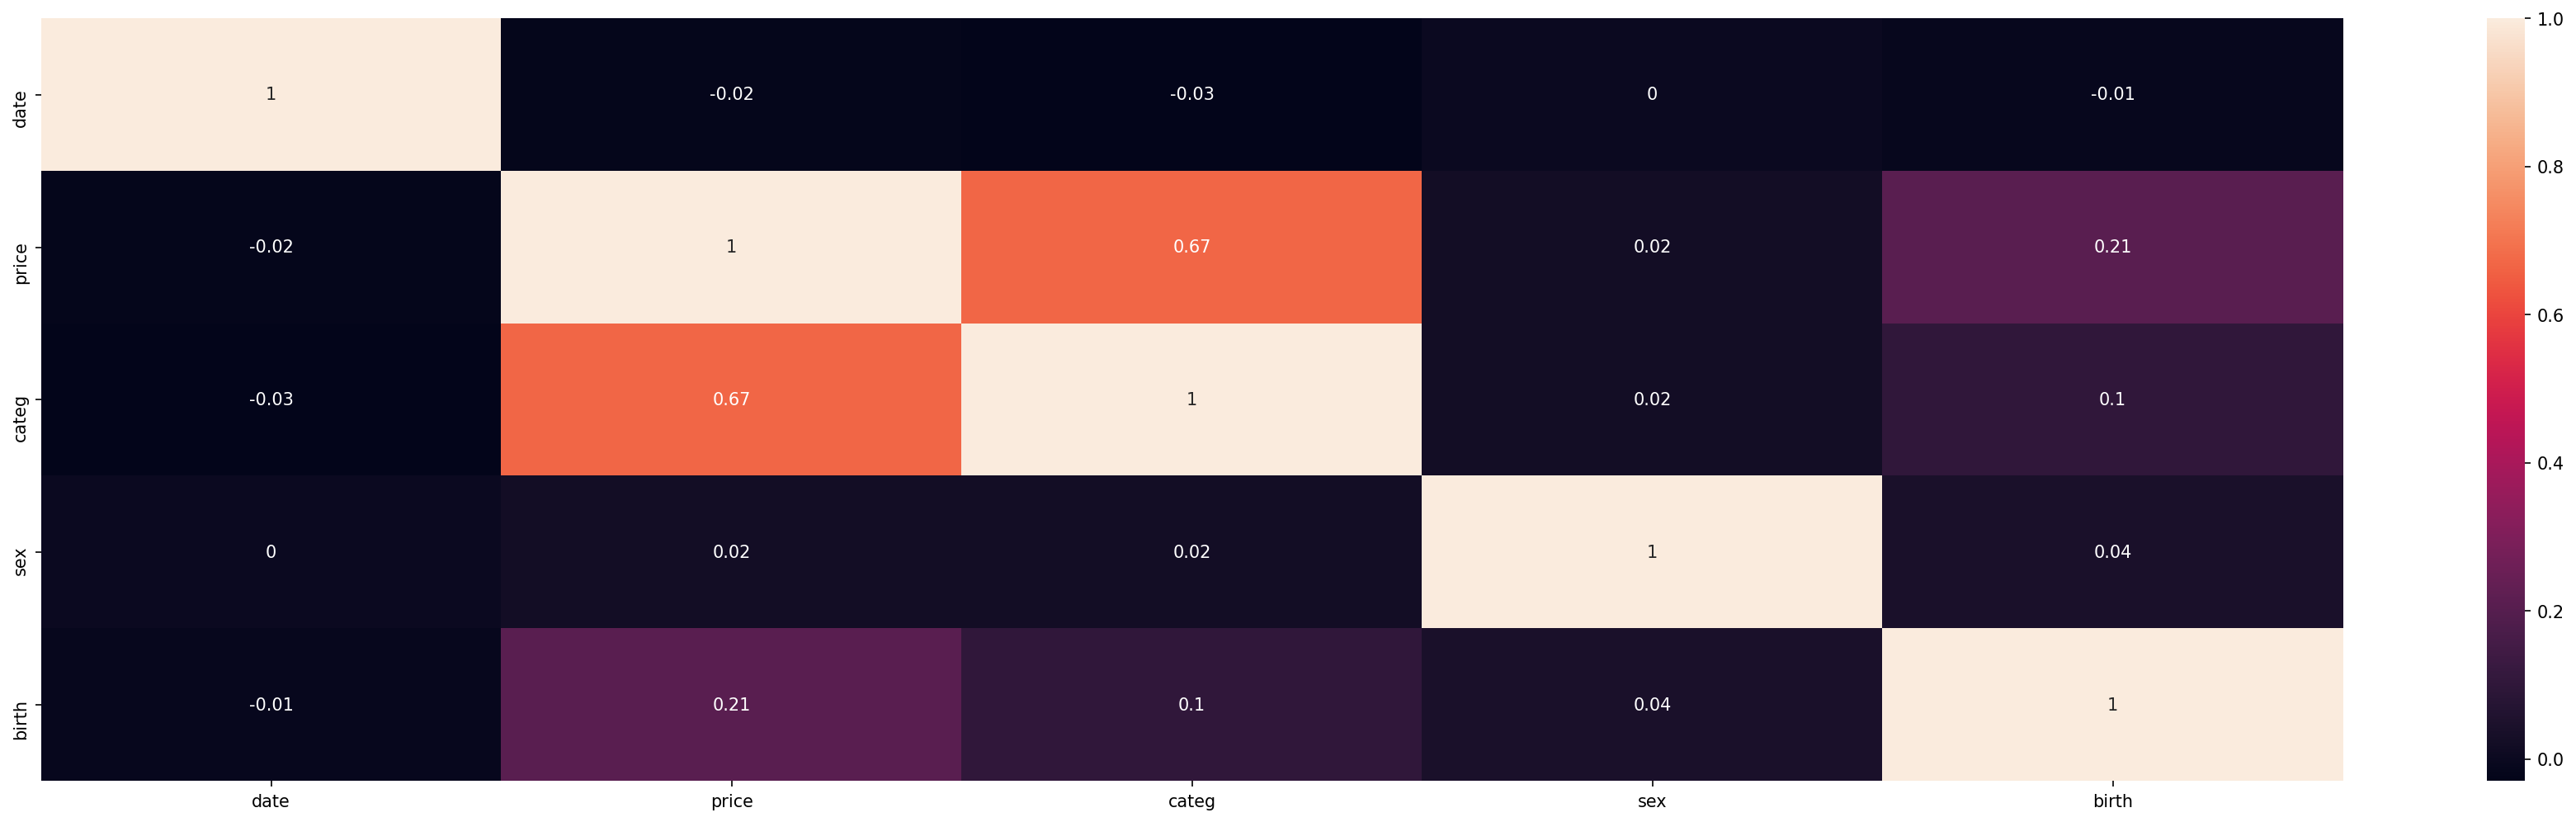

In [13]:
# transformer initilization
transformer = StandardScaler()

data_librairie_without_imputation_outlier_array = np.array(data_librairie_without_imputation_outlier)

# transformed matrix
data_librairie_without_imputation_outlier_array = transformer.fit_transform(data_librairie_all_float)




# transactions_array = np.array(transactions_normalized)
pd.DataFrame(data_librairie_without_imputation_outlier_array, columns=data_librairie_all_float.columns).describe()

heatmap_data_librairie = pd.DataFrame(data_librairie_without_imputation_outlier_array, columns=data_librairie_all_float.columns)
heatmap_data_librairie_clean = heatmap_data_librairie[["date", "price", "categ", "sex", "birth"]]
plt.figure(dpi=150, figsize=(30,8))
sns.heatmap(((heatmap_data_librairie_clean.corr())).round(2), annot=True);

## Observation des ventes en terme de nombre de produit et de CA

<ipython-input-12-f862519be15e>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(CA_categ,


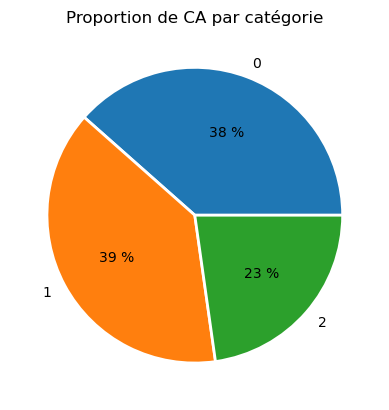

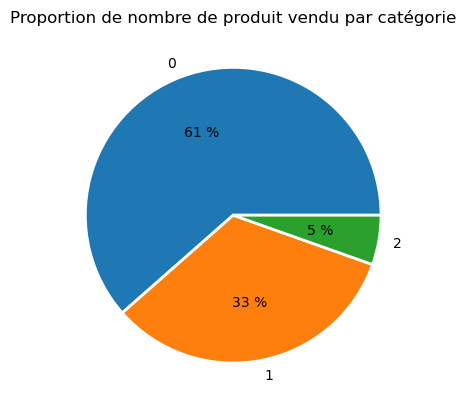

In [12]:
plt.pie(CA_categ, 
            labels=[0,1,2], 
            autopct=lambda x: str(int(round(x))) + ' %',  
            wedgeprops={'edgecolor' : 'w', 'linewidth' : 2},            
           )
plt.title("Proportion de CA par catégorie")
plt.savefig('./dataset_P4/Propotion_CA_by_categorie.png')


plt.show()


nb_prod_categ0 = ((data_librairie_without_imputation_outlier[data_librairie_without_imputation_outlier["categ"] == 0])["id_prod"].value_counts()).sum()
nb_prod_categ1 = ((data_librairie_without_imputation_outlier[data_librairie_without_imputation_outlier["categ"] == 1])["id_prod"].value_counts()).sum()
nb_prod_categ2 = ((data_librairie_without_imputation_outlier[data_librairie_without_imputation_outlier["categ"] == 2])["id_prod"].value_counts()).sum()
nb_prod__par_categ= [nb_prod_categ0, nb_prod_categ1, nb_prod_categ2]


plt.pie(nb_prod__par_categ, 
            labels=[0,1,2], 
            autopct=lambda x: str(int(round(x))) + ' %',  
            wedgeprops={'edgecolor' : 'w', 'linewidth' : 2},            
           )
plt.title("Proportion de nombre de produit vendu par catégorie")

plt.savefig('./dataset_P4/Propotion_nbproduit_by_categorie.png')


plt.show()


## Observation de la fréquence d'achat moyenne mensuel
### graphique avec les valeurs extrèmes

2.406551881313317

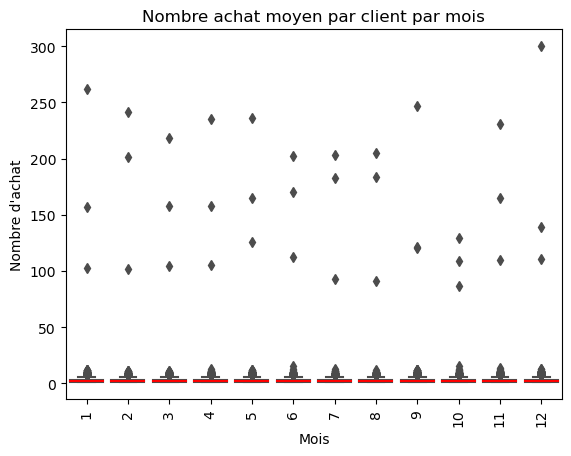

In [13]:
data_librairie = pd.read_csv("dataset_P4/data_librairie.csv", sep=",") #lire fichier csv
data_librairie_clean = data_librairie.drop(columns='Unnamed: 0')
data_librairie_without_imputation = data_librairie_clean[data_librairie_clean["client_id"] != "c_imput"]
data_librairie_without_imputation_outlier = data_librairie_without_imputation[~(data_librairie_without_imputation['client_id']== "c_1609") | (data_librairie_without_imputation['client_id']== "c_3454") | (data_librairie_without_imputation['client_id']== "c_4958") | (data_librairie_without_imputation['client_id']== "c_6714")]


session_client_date_filtre = ["client_id", "date", "session_id"]
session_client_date = (data_librairie_without_imputation_outlier[session_client_date_filtre]).drop_duplicates("session_id", keep='last')

session_client_date["month num"] = (pd.to_datetime(session_client_date["date"])).dt.month
session_client_date["month text"] = (pd.to_datetime(session_client_date["date"])).dt.month_name().copy()
session_client_date["nb_commande_par_mois"] = 1
session_client_date_trie = (session_client_date.sort_values(by = ["client_id", "month num"]))

nb_commmande_par_mois_client = session_client_date.pivot_table("nb_commande_par_mois", index = "client_id" , columns='month text', aggfunc=sum)                            
nb_commmande_par_mois_client_clean = (nb_commmande_par_mois_client.fillna(0))# .sort_values(axis = 0, by = ['March', 'April', "May", "June", "July", "August", "September", "October", "November", "December", "January", "February"])


trie_par_mois = ['March', 'April', "May", "June", "July", "August", "September", "October", "November", "December", "January", "February"]

nb_commmande_par_mois_client_clean_trier = nb_commmande_par_mois_client_clean[trie_par_mois]


data_librairie_without_imputation_outlier 
session_client_date_trie
nb_commmande_par_mois_client_clean

x = session_client_date_trie.groupby(by=["month num", "client_id"]).sum()


x2 = x.droplevel('client_id')

x3 = x2.reset_index()

x3

# figure settings
# plt.figure(figsize=(20,8), dpi=200)

sns.boxplot(
            x = x3['month num'],
            y= x3["nb_commande_par_mois"],
            data=x3,
#             showfliers = False, 
            color='blue',
            medianprops={'color':'red'})
        
# plt.axis(ymax=15, ymin=0)
plt.title("Nombre achat moyen par client par mois")
plt.ylabel("Nombre d'achat")
plt.xlabel("Mois")
plt.xticks(rotation=90)
plt.savefig('./dataset_P4/Frequ_nbachat_moyen_month.png')


x3.sort_values(by = 'nb_commande_par_mois')
x3["nb_commande_par_mois"].mean()
# x.sort_values(by = 'nb_commande_par_mois', ascending = False)

### Graphique après la suppresion des outliers

In [17]:
y1 = x.reset_index()
y2 = y1[(y1["client_id"] != "c_3454") & (y1["client_id"] != "c_4958")  & (y1["client_id"] != "c_6714")]
y2.sort_values(by = 'client_id', ascending = False)


,month num,client_id,nb_commande_par_mois
68010,12,c_999,1
56273,10,c_999,2
51183,9,c_999,5
45491,8,c_999,3
39851,7,c_999,1
...,...,...,...
51184,10,c_1,1
62147,12,c_1,3
34182,7,c_1,4
39852,8,c_1,1


2.3212798823096725

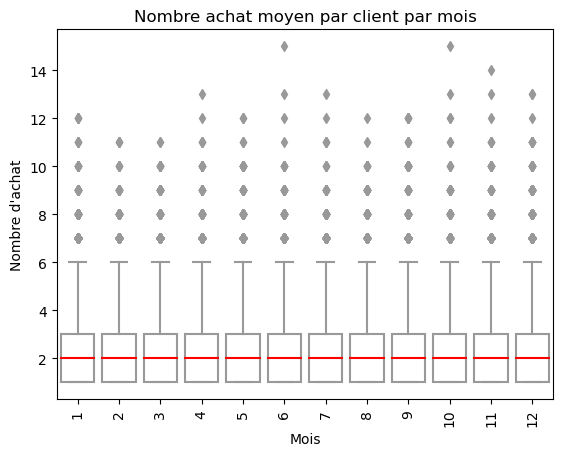

In [18]:
# figure settings
# plt.figure(figsize=(20,8), dpi=200)

sns.boxplot(
            x = y2['month num'],
            y= y2["nb_commande_par_mois"],
            data=y2,
#             showfliers = False, 
            color='w',
            medianprops={'color':'red'})
        
# plt.axis(ymax=15, ymin=0)
plt.title("Nombre achat moyen par client par mois")
plt.ylabel("Nombre d'achat")
plt.xlabel("Mois")
plt.xticks(rotation=90)
plt.savefig('./dataset_P4/Frequ_nbachat_moyen_month_without_outliers.png')


# 2.406551881313317 achat par client par mois avec outliers
y2["nb_commande_par_mois"].mean()
# 2.3212798823096725 achat par client par mois sans outliers c_3454   c_4958    c_6714


## Observation de la durée moyenne entre deux achats par clients
### Changement du format des données en date

In [15]:
session_client_date_month = session_client_date.groupby(by=["month num", "client_id", "session_id", "date"]).sum().reset_index()

session_client_date_month2 = session_client_date.groupby(by=["month num", "client_id", "date"]).sum().reset_index().drop(0).drop(columns = ["nb_commande_par_mois" ])
# session_client_date_month2.loc[16371]=[ 12, "r2d2", '2021-12-17 03:28:47.129085' ]





last_client = [( 12, "r2d2", "2021-12-17 03:28:47.129085") ]
dfNew=pd.DataFrame(last_client, columns = ['month num' , 'client_id', 'date'])
session_client_date_month2=session_client_date_month2.append(dfNew,ignore_index=True)

session_client_date_month2

,month num,client_id,date
0,1,c_1000,2022-01-30 00:41:22.504825
1,1,c_1000,2022-01-30 05:28:12.614544
2,1,c_1003,2022-01-22 14:56:32.177424
3,1,c_1003,2022-01-30 04:38:07.853854
4,1,c_1004,2022-01-31 06:05:21.869705
...,...,...,...
163667,12,c_996,2021-12-30 12:53:39.757507
163668,12,c_996,2021-12-30 18:20:53.326685
163669,12,c_998,2021-12-27 03:04:24.391666
163670,12,c_999,2021-12-17 03:28:47.129085


In [16]:
session_client_date_month2["date1"] = pd.to_datetime(session_client_date_month["date"])
session_client_date_month2["date2"] = pd.to_datetime(session_client_date_month2["date"])
session_client_date_month2["month num1"] = session_client_date_month["month num"]
session_client_date_month2["month num2"] = session_client_date_month2["month num"]

session_client_date_month2["client_id2"] = session_client_date_month["client_id"]


session_client_date["month num"] = (pd.to_datetime(session_client_date["date"])).dt.month.copy()



session_client_date_month2['Difference'] = abs(((session_client_date_month2['date2']) - (session_client_date_month2['date1'])).dt.days)

session_client_date_month3 = session_client_date_month2[(session_client_date_month2["client_id"] == session_client_date_month2["client_id2"])  & (session_client_date_month2["Difference"] > 0) ]
session_client_date_month3["month"] = pd.to_datetime(session_client_date_month3["date"]).dt.month_name()
session_client_date_month3["year"] = pd.to_datetime(session_client_date_month3["date"]).dt.year

session_client_date_month3["month num"]  = np.where(session_client_date_month3["year"] == 2022, (session_client_date_month3["month num"]+12) , session_client_date_month3["month num"])
session_client_date_month4 = session_client_date_month3.sort_values(by = 'month num')


session_client_date_month4


<ipython-input-16-1b18523c5671>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_client_date_month3["month"] = pd.to_datetime(session_client_date_month3["date"]).dt.month_name()
<ipython-input-16-1b18523c5671>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_client_date_month3["year"] = pd.to_datetime(session_client_date_month3["date"]).dt.year
<ipython-input-16-1b18523c5671>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,month num,client_id,date,date1,date2,month num1,month num2,client_id2,Difference,month,year
40362,3,c_7675,2021-03-12 04:31:42.168284,2021-03-04 10:34:56.444105,2021-03-12 04:31:42.168284,3,3,c_7675,7,March,2021
36962,3,c_5827,2021-03-28 20:47:56.045560,2021-03-31 16:16:08.429450,2021-03-28 20:47:56.045560,3,3,c_5827,3,March,2021
36961,3,c_5827,2021-03-13 21:44:20.645449,2021-03-28 20:47:56.045560,2021-03-13 21:44:20.645449,3,3,c_5827,15,March,2021
36957,3,c_5825,2021-03-14 10:27:11.641816,2021-03-12 17:07:15.521111,2021-03-14 10:27:11.641816,3,3,c_5825,1,March,2021
36956,3,c_5825,2021-03-12 17:07:15.521111,2021-03-07 08:28:42.448200,2021-03-12 17:07:15.521111,3,3,c_5825,5,March,2021
...,...,...,...,...,...,...,...,...,...,...,...
19280,14,c_3683,2022-02-07 22:44:09.202679,2022-02-03 11:20:35.795520,2022-02-07 22:44:09.202679,2,2,c_3683,4,February,2022
19278,14,c_3682,2022-02-28 08:19:44.709957,2022-02-16 21:23:12.946847,2022-02-28 08:19:44.709957,2,2,c_3682,11,February,2022
19277,14,c_3682,2022-02-16 21:23:12.946847,2022-02-11 11:22:35.706301,2022-02-16 21:23:12.946847,2,2,c_3682,5,February,2022
19296,14,c_3694,2022-02-12 12:26:31.929672,2022-02-08 22:06:42.391797,2022-02-12 12:26:31.929672,2,2,c_3694,3,February,2022


### Réalisation du graphique 

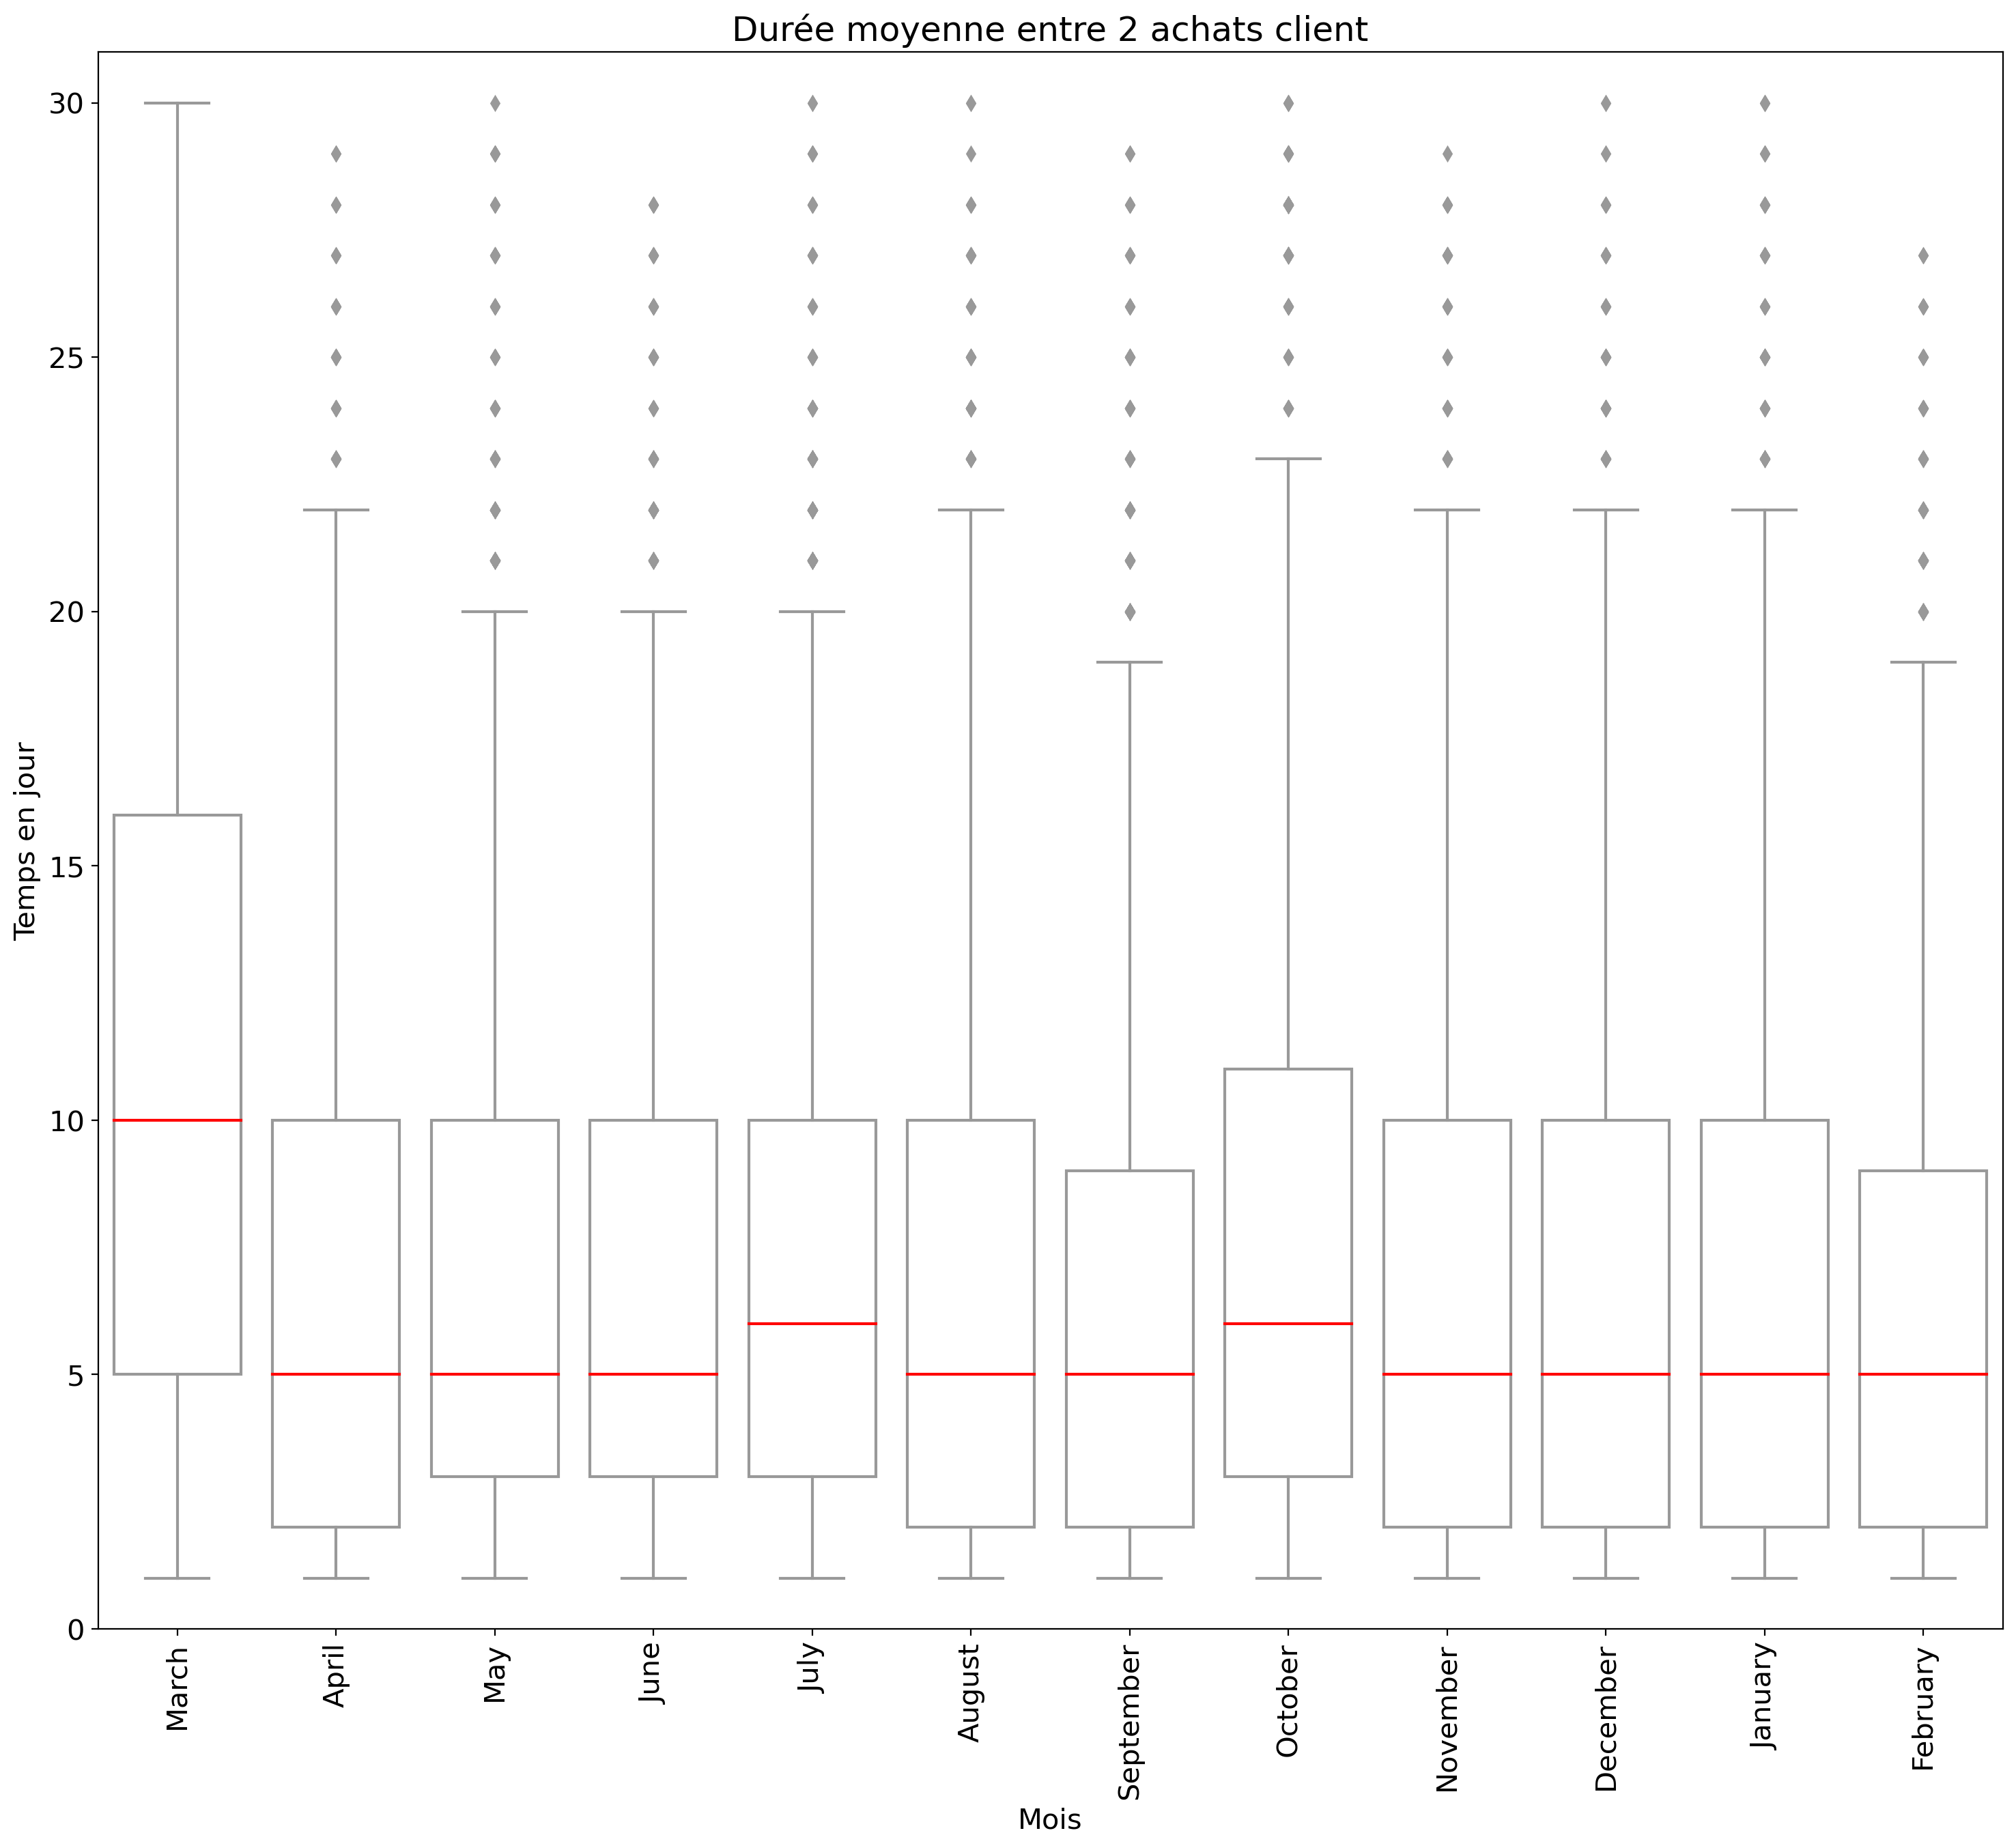

In [17]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(18,15), dpi=200)

sns.boxplot(
            x = session_client_date_month4['month'],
            y= session_client_date_month4["Difference"],
            data=session_client_date_month4,
#             showfliers = False, 
            color='w',
            medianprops={'color':'red'})
        
plt.axis(ymax=31, ymin=0)
plt.title("Durée moyenne entre 2 achats client")
plt.ylabel("Temps en jour")
plt.xlabel("Mois")
plt.xticks(rotation=90)

plt.savefig('./dataset_P4/time_between_session_client.png')


# x3.sort_values(by = 'nb_commande_par_mois')

### Exploration des données pour comprendre la hausse de la durée en Mars

<ipython-input-18-d79ef332c21e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  session_client_date_month_april = session_client_date_month3[session_client_date_month4['month'] == "April"]
<ipython-input-18-d79ef332c21e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_client_date_month_april["days"] = pd.to_datetime(session_client_date_month_april["date"]).dt.day


,month num,client_id,date,date1,date2,month num1,month num2,client_id2,Difference,month,year,days
42721,4,c_1314,2021-04-02 17:48:18.128386,2021-04-01 03:43:58.063993,2021-04-02 17:48:18.128386,4,4,c_1314,1,April,2021,2
42929,4,c_1424,2021-04-02 17:08:18.988629,2021-04-01 13:57:07.395777,2021-04-02 17:08:18.988629,4,4,c_1424,1,April,2021,2
43015,4,c_1467,2021-04-02 19:46:47.114254,2021-04-01 12:58:29.656482,2021-04-02 19:46:47.114254,4,4,c_1467,1,April,2021,2
44883,4,c_2595,2021-04-02 19:45:41.714237,2021-04-01 11:38:30.303725,2021-04-02 19:45:41.714237,4,4,c_2595,1,April,2021,2
45681,4,c_3083,2021-04-02 10:32:43.239877,2021-04-01 08:29:02.941480,2021-04-02 10:32:43.239877,4,4,c_3083,1,April,2021,2
47143,4,c_3862,2021-04-02 13:34:16.443516,2021-04-01 06:10:55.286413,2021-04-02 13:34:16.443516,4,4,c_3862,1,April,2021,2
47639,4,c_4182,2021-04-02 20:41:59.230883,2021-04-01 01:49:44.748311,2021-04-02 20:41:59.230883,4,4,c_4182,1,April,2021,2
48303,4,c_4587,2021-04-02 23:50:31.697140,2021-04-01 21:25:14.993619,2021-04-02 23:50:31.697140,4,4,c_4587,1,April,2021,2
49099,4,c_4991,2021-04-02 22:38:03.461339,2021-04-01 06:52:13.408482,2021-04-02 22:38:03.461339,4,4,c_4991,1,April,2021,2
49439,4,c_5162,2021-04-02 21:36:41.366969,2021-04-01 13:36:06.572758,2021-04-02 21:36:41.366969,4,4,c_5162,1,April,2021,2


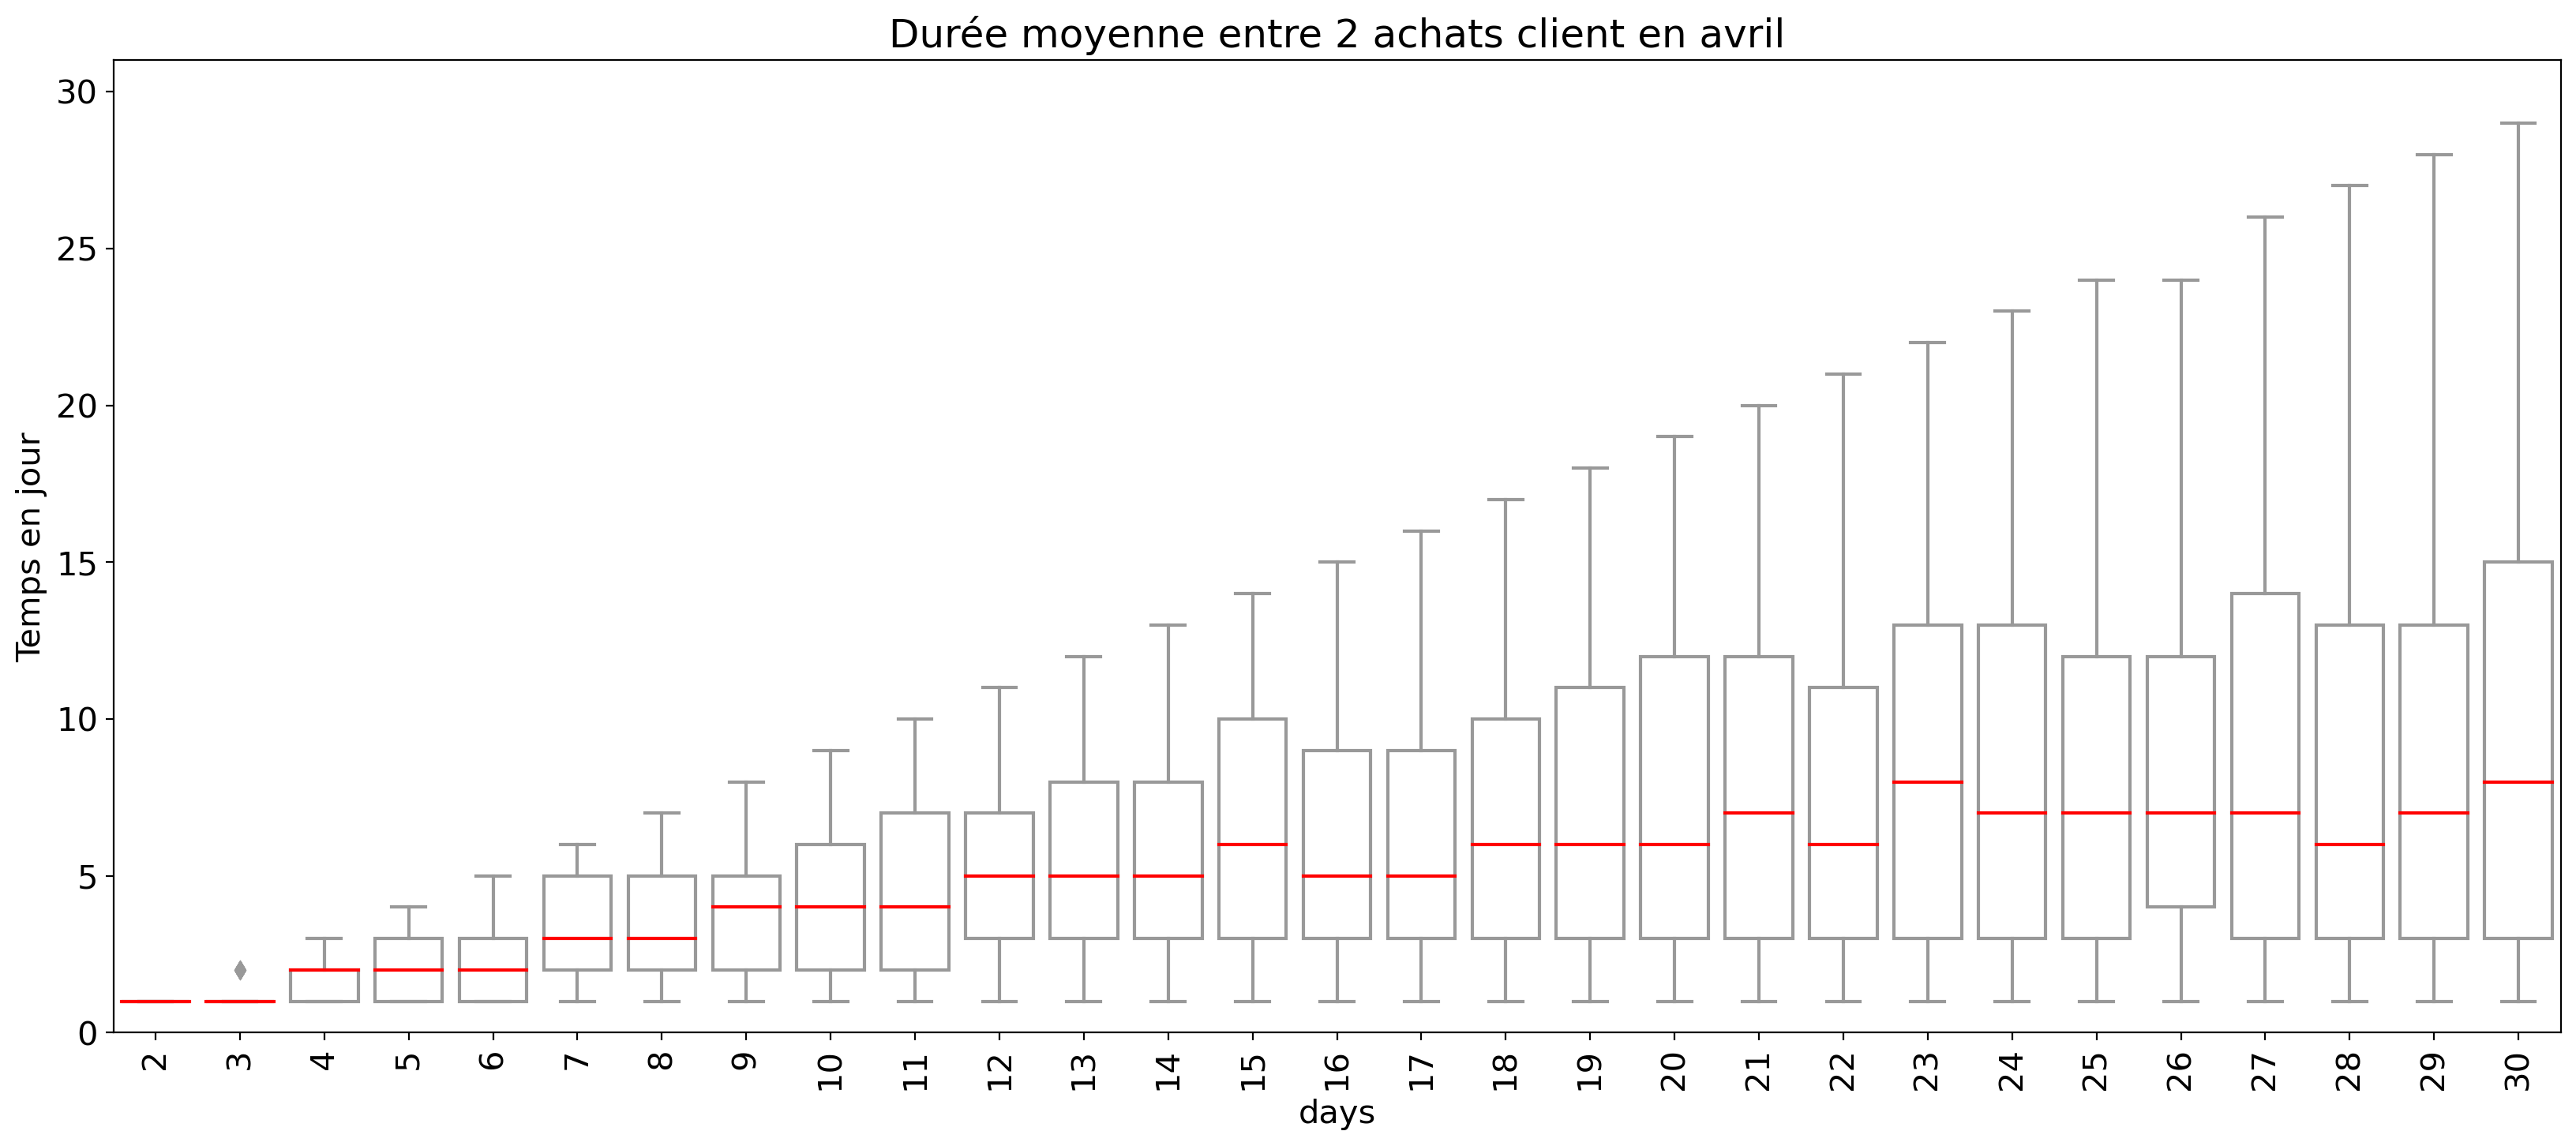

In [18]:
session_client_date_month_april = session_client_date_month3[session_client_date_month4['month'] == "April"]


session_client_date_month_april["days"] = pd.to_datetime(session_client_date_month_april["date"]).dt.day
session_client_date_month_april2 = session_client_date_month_april.sort_values(by = [  "days","client_id"])
session_client_date_month_april2


plt.figure(figsize=(20,8), dpi=200)

sns.boxplot(
            x = session_client_date_month_april2['days'],
            y= session_client_date_month_april2["Difference"],
            data=session_client_date_month_april2,
#             showfliers = False, 
            color='w',
            medianprops={'color':'red'})
        
plt.axis(ymax=31, ymin=0)
plt.title("Durée moyenne entre 2 achats client en avril")
plt.ylabel("Temps en jour")
plt.xlabel("days")
plt.xticks(rotation=90)

session_client_date_month_april2.head(50)

<ipython-input-19-bf98fe2dac4a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  session_client_date_month_march = session_client_date_month3[session_client_date_month4['month'] == "March"]
<ipython-input-19-bf98fe2dac4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_client_date_month_march["days"] = pd.to_datetime(session_client_date_month_march["date"]).dt.day


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

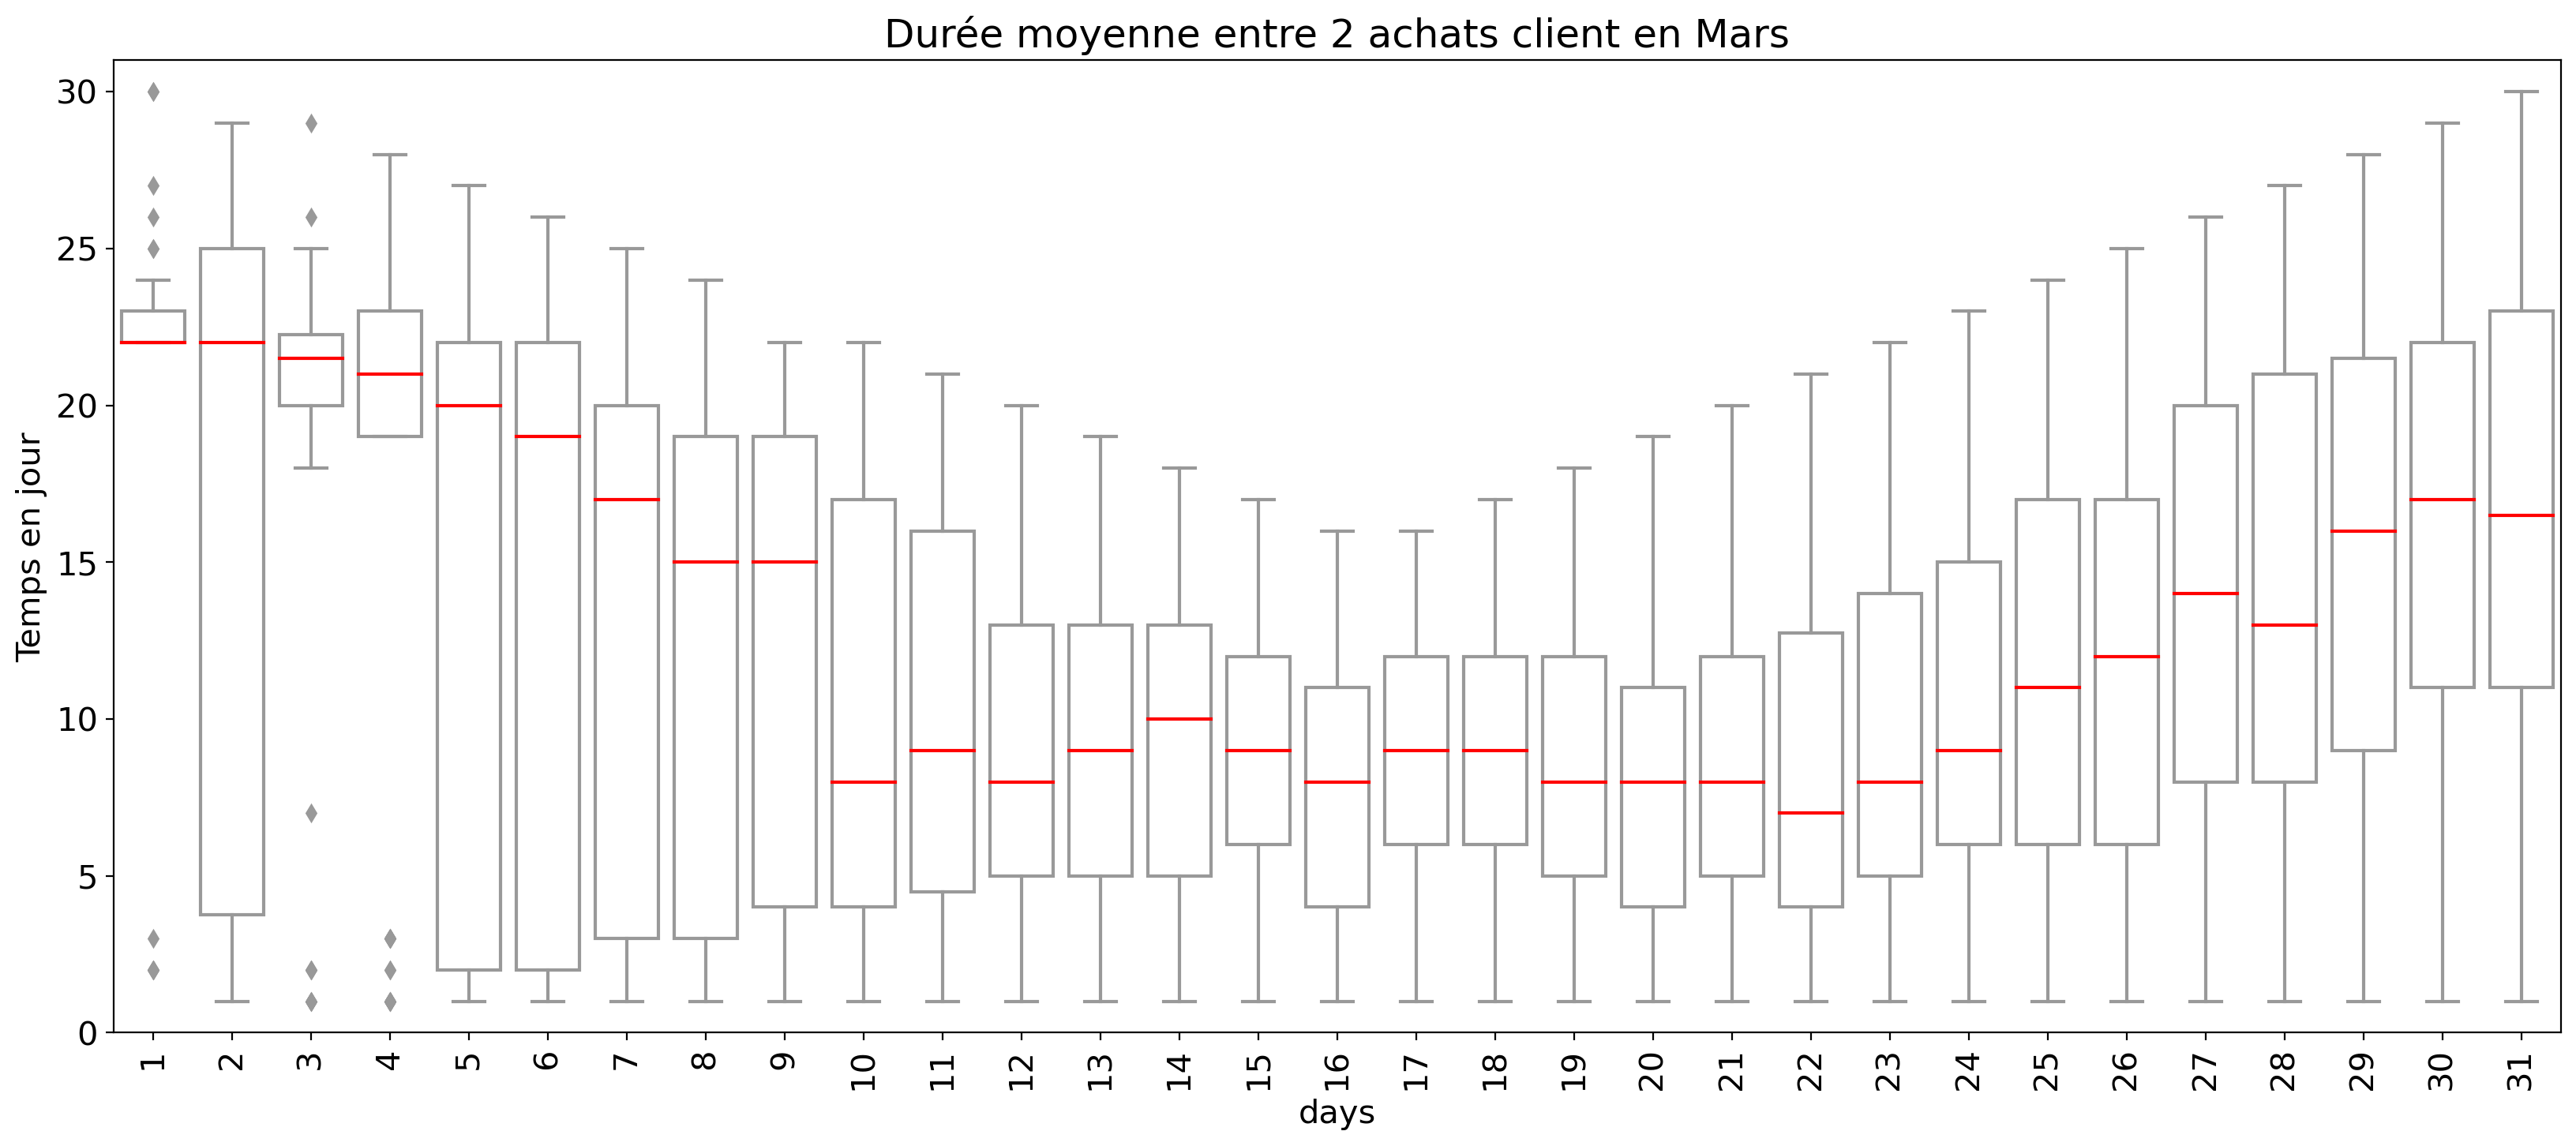

In [19]:
session_client_date_month_march = session_client_date_month3[session_client_date_month4['month'] == "March"]


session_client_date_month_march["days"] = pd.to_datetime(session_client_date_month_march["date"]).dt.day
session_client_date_month_march2 = session_client_date_month_march.sort_values(by = [  "days", "client_id"])
session_client_date_month_march2

plt.figure(figsize=(20,8), dpi=200)

sns.boxplot(
            x = session_client_date_month_march2['days'],
            y= session_client_date_month_march2["Difference"],
            data=session_client_date_month_march2,
#             showfliers = False, 
            color='w',
            medianprops={'color':'red'})
        
plt.axis(ymax=31, ymin=0)
plt.title("Durée moyenne entre 2 achats client en Mars")
plt.ylabel("Temps en jour")
plt.xlabel("days")
plt.xticks(rotation=90)



### modification des données pour une meilleurs représentation

<ipython-input-21-2253ecad5847>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_client_date_month3["month"] = pd.to_datetime(session_client_date_month3["date"]).dt.month_name()
<ipython-input-21-2253ecad5847>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_client_date_month3["year"] = pd.to_datetime(session_client_date_month3["date"]).dt.year
<ipython-input-21-2253ecad5847>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

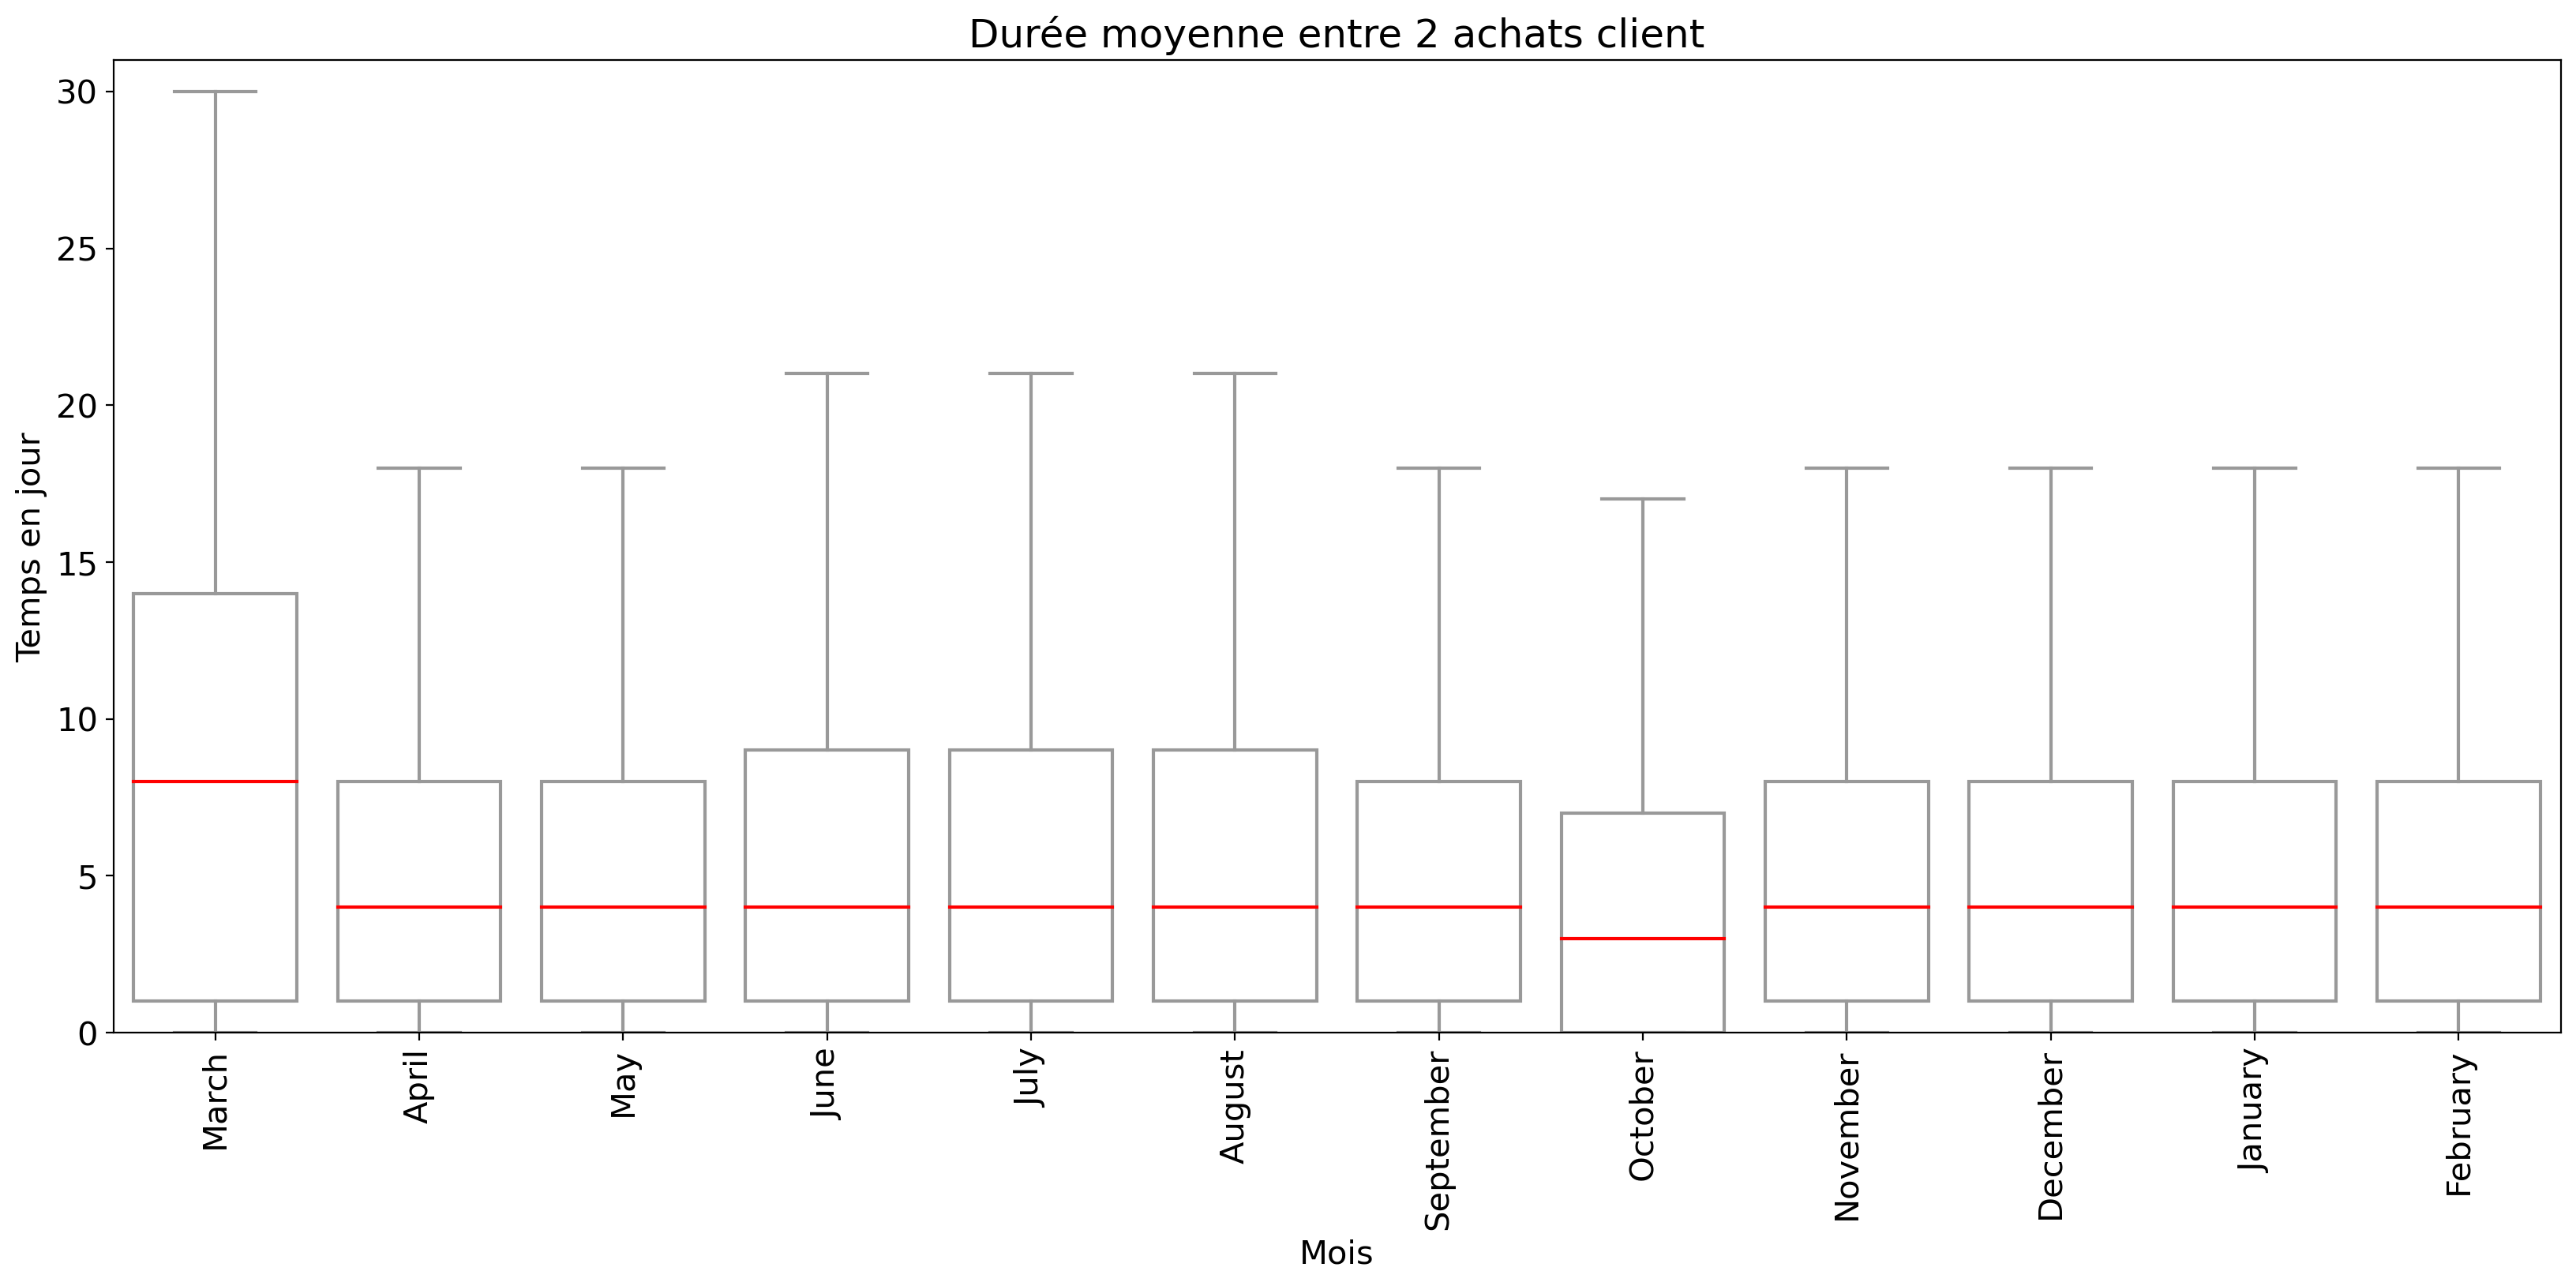

In [21]:
session_client_date_month2["date1"] = pd.to_datetime(session_client_date_month["date"])
session_client_date_month2["date2"] = pd.to_datetime(session_client_date_month2["date"])
session_client_date_month2["month num1"] = session_client_date_month["month num"]
session_client_date_month2["month num2"] = session_client_date_month2["month num"]

session_client_date_month2["client_id2"] = session_client_date_month["client_id"]


session_client_date["month num"] = (pd.to_datetime(session_client_date["date"])).dt.month.copy()



session_client_date_month2['Difference'] = abs(((session_client_date_month2['date2']) - (session_client_date_month2['date1'])).dt.days)

session_client_date_month3 = session_client_date_month2[(session_client_date_month2["client_id"] == session_client_date_month2["client_id2"])]
session_client_date_month3["month"] = pd.to_datetime(session_client_date_month3["date"]).dt.month_name()
session_client_date_month3["year"] = pd.to_datetime(session_client_date_month3["date"]).dt.year
session_client_date_month3["days"] = pd.to_datetime(session_client_date_month3["date"]).dt.day


session_client_date_month3["month num"]  = np.where(session_client_date_month3["year"] == 2022, (session_client_date_month3["month num"]+12) , session_client_date_month3["month num"])
session_client_date_month4 = session_client_date_month3.sort_values(by = ['month num', "client_id", "days"])


session_client_date_month4



plt.figure(figsize=(20,8), dpi=200)

sns.boxplot(
            x = session_client_date_month4['month'],
            y= session_client_date_month4["Difference"],
            data=session_client_date_month4,
            showfliers = False, 
            color='w',
            medianprops={'color':'red'})
        
plt.axis(ymax=31, ymin=0)
plt.title("Durée moyenne entre 2 achats client")
plt.ylabel("Temps en jour")
plt.xlabel("Mois")
plt.xticks(rotation=90)


In [27]:
session_client_date_month4[session_client_date_month4["days"] < 15]
# <5 =  5439 
# > 25 = 27951 
# 30/31 = 6699 

# >=15 = 65928 
# <15 = 29733  





,month num,client_id,date,date1,date2,month num1,month num2,client_id2,Difference,month,year,days
28418,3,c_1000,2021-03-14 12:34:53.961241,2021-03-13 13:40:59.326964,2021-03-14 12:34:53.961241,3,3,c_1000,0,March,2021,14
28443,3,c_1014,2021-03-14 07:13:03.042139,2021-03-03 03:25:12.320225,2021-03-14 07:13:03.042139,3,3,c_1014,11,March,2021,14
28455,3,c_1025,2021-03-06 03:48:12.864328,2021-03-03 05:26:54.823411,2021-03-06 03:48:12.864328,3,3,c_1025,2,March,2021,6
28466,3,c_1028,2021-03-05 03:06:32.870842,2021-03-31 03:25:47.924475,2021-03-05 03:06:32.870842,3,3,c_1028,27,March,2021,5
28467,3,c_1028,2021-03-05 21:40:03.167016,2021-03-03 23:53:30.633157,2021-03-05 21:40:03.167016,3,3,c_1028,1,March,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28374,14,c_969,2022-02-10 02:26:55.650496,2022-02-05 01:21:06.410417,2022-02-10 02:26:55.650496,2,2,c_969,5,February,2022,10
28387,14,c_981,2022-02-07 00:57:42.811381,2022-02-01 12:24:07.146002,2022-02-07 00:57:42.811381,2,2,c_981,5,February,2022,7
28390,14,c_982,2022-02-11 17:48:05.000667,2022-02-08 13:35:55.309150,2022-02-11 17:48:05.000667,2,2,c_982,3,February,2022,11
28395,14,c_983,2022-02-12 15:15:47.301600,2022-02-01 00:49:49.529562,2022-02-12 15:15:47.301600,2,2,c_983,11,February,2022,12


### Exclusion du mois de mars pour les calculs de durrée moyenne entre deux achats

<ipython-input-28-da8f0f84fcee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_client_date_days["days"] = pd.to_datetime(session_client_date_days["date"]).dt.day


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

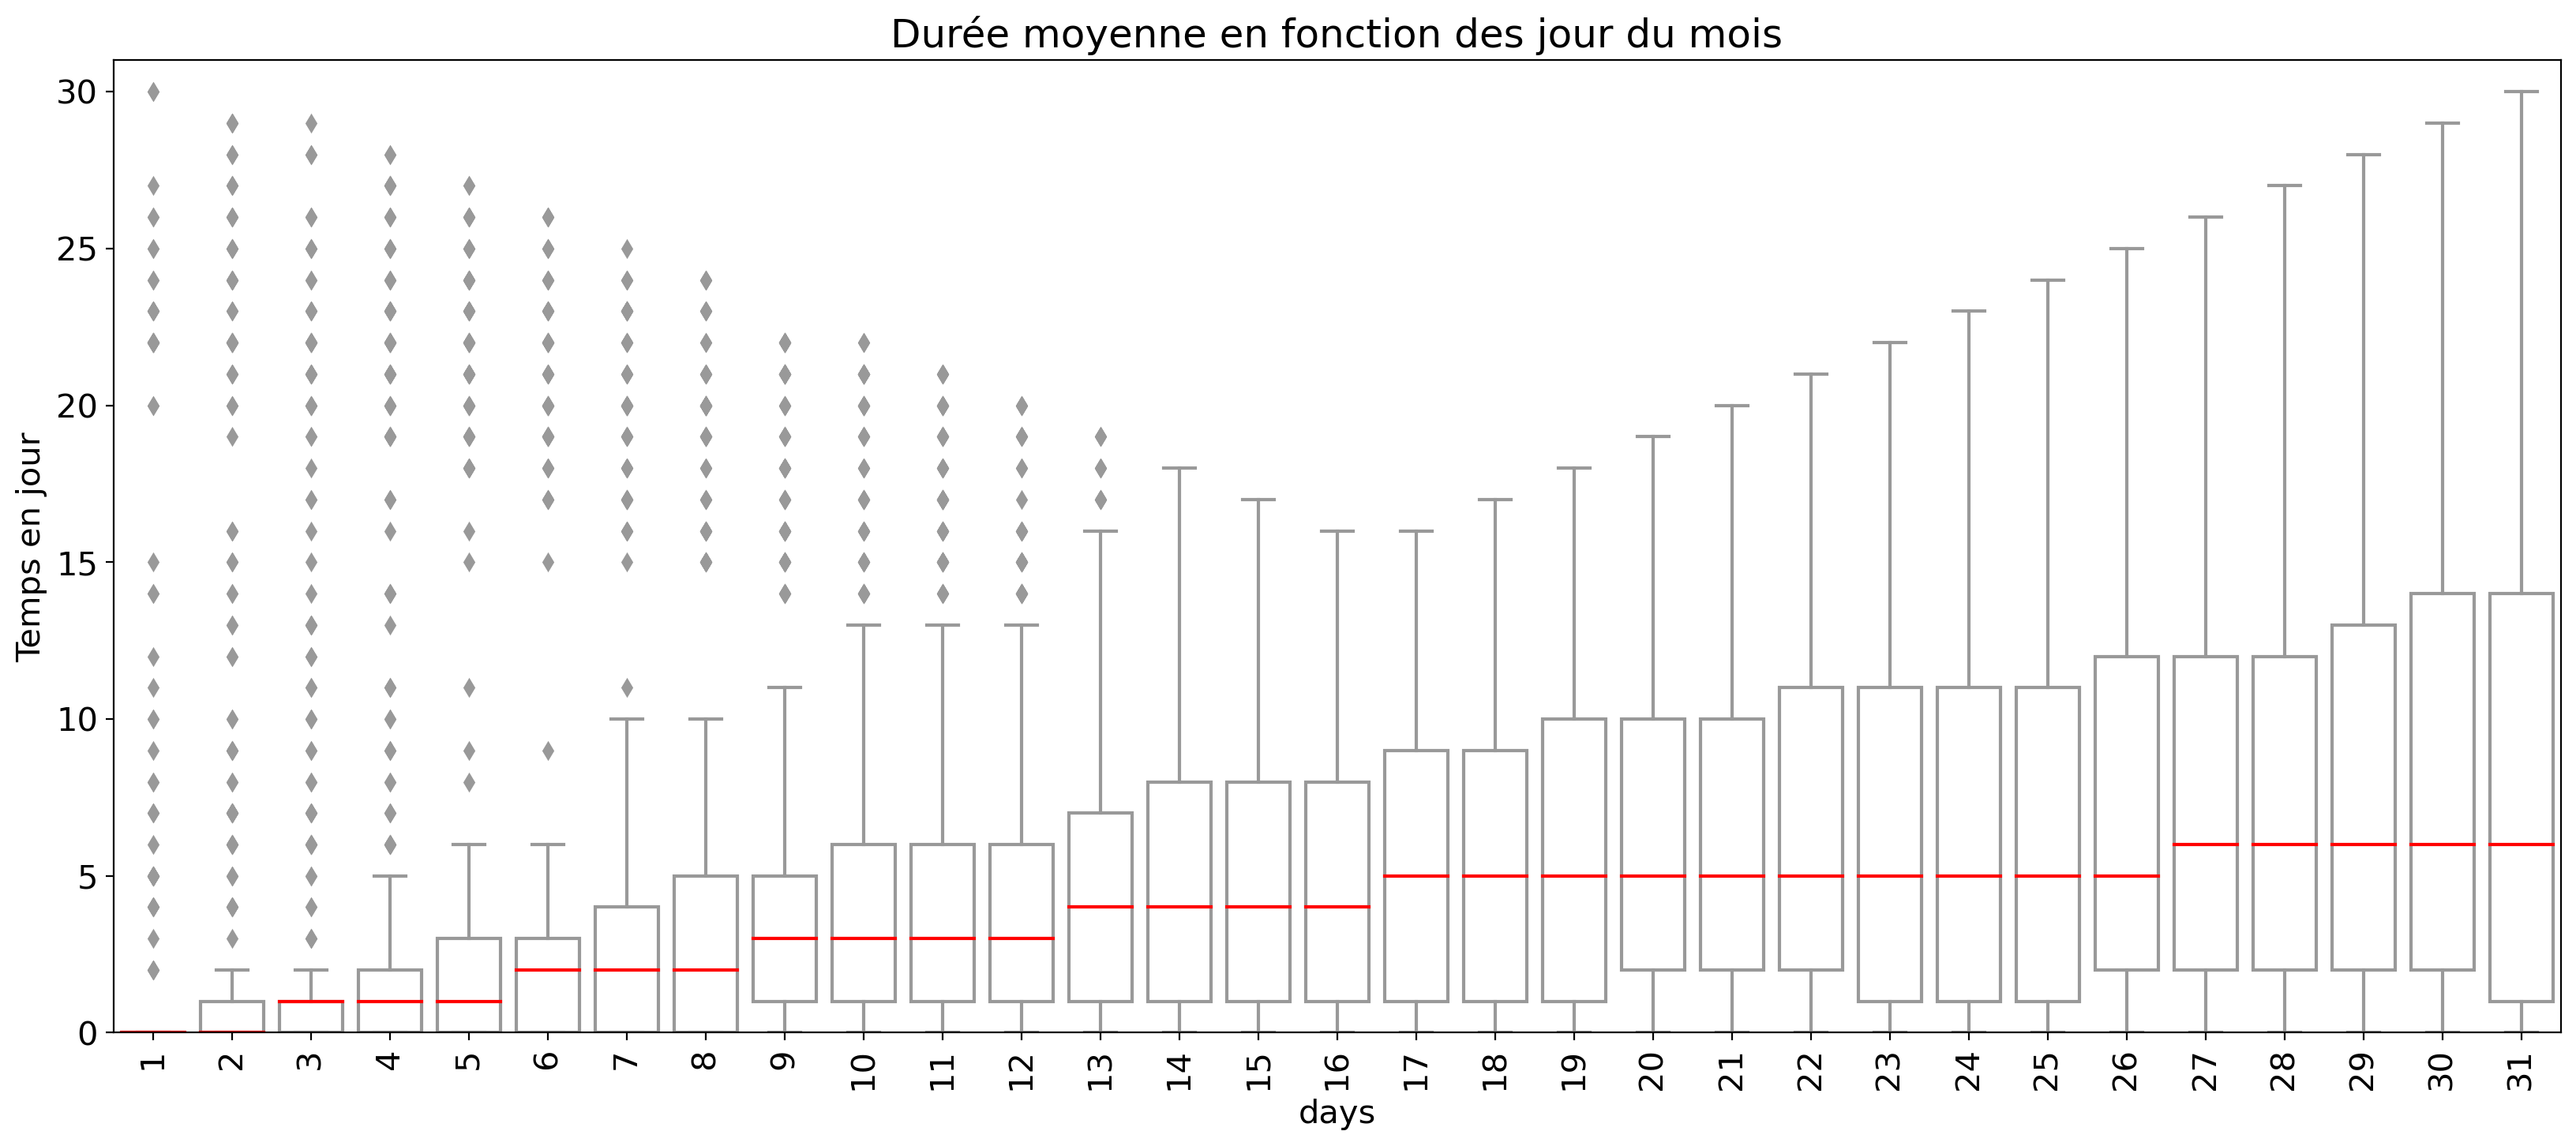

In [28]:
session_client_date_days = session_client_date_month3


session_client_date_days["days"] = pd.to_datetime(session_client_date_days["date"]).dt.day
session_client_date_days2 = session_client_date_days.sort_values(by = [  "days", "client_id"])
session_client_date_days2

plt.figure(figsize=(20,8), dpi=200)

sns.boxplot(
            x = session_client_date_days2['days'],
            y= session_client_date_days2["Difference"],
            data=session_client_date_days2,
#             showfliers = False, 
            color='w',
            medianprops={'color':'red'})
        
plt.axis(ymax=31, ymin=0)
plt.title("Durée moyenne en fonction des jour du mois")
plt.ylabel("Temps en jour")
plt.xlabel("days")
plt.xticks(rotation=90)

# session_client_date_days2.head(50)